<a href="https://colab.research.google.com/github/lucaskrlima/bootcamp_soulcode_da/blob/main/Projeto_Final_GP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

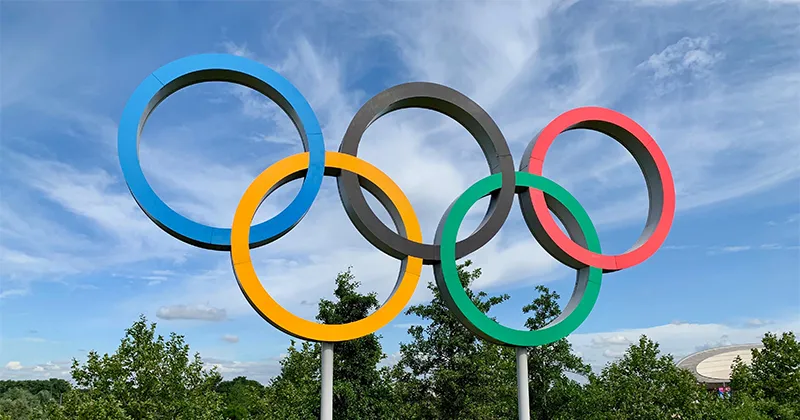

# PROJETO FINAL

Instituição:

**SoulCode Academy**

Turma:

**AD2 Análise de Dados**

Orientador:

**Professor Douglas Ribeiro**

# ANALISTAS

* Fábio Marcio
* Deivid Augusto
* Lucas Lima
* Letícia Cavalcante
* Isabela Dantas
* Guilherme Rosa

# REQUISITOS OBRIGATÓRIOS

* Obrigatoriamente os datasets devem ter formatos diferentes (CSV / Json / Sql / NoSql/ Excel, outros) e 1 deles obrigatoriamente tem que ser em CSV.
* Operações com Pandas (limpezas , transformações e normalizações)
* Operações de análise de dados usando PySpark com a justificativa de cada uma das transformações utilizadas com o mesmo.
* Utilizar pelo menos 2 gráficos distintos (bibliotecas python) para representar os dados e encontrar possíveis inconsistências
* Os datasets utilizados podem ser em língua estrangeira , mas devem ao final terem seus dados/colunas exibidos na língua PT-BR (Utilizar a diretrizes abordadas em aula)
* Os datasets devem ser salvos e operados em armazenamento cloud obrigatoriamente dentro da plataforma GCP (não pode ser usado Google drive ou armazenamento alheio ao google)
* Os dados tratados devem ser armazenados obrigatoriamente em um datalake(Bucket ) , DW(BigQuery) ou em ambos.
* Os Dataframe(s) resultante(s) deve(m) estar em uma coleção do MongoDB atlas (informar a key de acesso ao cluster)
Deve ser feita no mínimo 4 análises dentro do Big Query utilizando a linguagem padrão SQL com a descrição das consultas feitas.
* Deve ser criado no Looker Studio e no PowerBI um dashboard para exibição gráfica dos dados tratados trazendo insights importantes
E deve ser demonstrado em um workflow simples (gráfico) as etapas de ETL com suas respectivas ferramentas.
Fazer a documentação do projeto;

# INFORMAÇÕES DOS TADASETES

**Tabela 120 anos de história olímpica**


* ID: Identificador único para cada registro/linha na tabela.
* Name: Nome do atleta ou pessoa associada ao registro.
* Sex: Sexo ou gênero do atleta.
* Age: Idade do atleta durante os jogos ou evento esportivo.
* Height: Altura do atleta em unidades específicas.
* Weight: Peso do atleta em unidades específicas.
* Team: Nome ou código da equipe à qual o atleta pertence.
* NOC: Código do Comitê Olímpico Nacional do país do atleta.
* Games: Nome dos jogos ou evento esportivo.
* Year: Ano em que os jogos ou evento esportivo ocorreram.
* Season: Estação do ano em que os jogos foram realizados.
* City: Nome da cidade onde os jogos ou evento esportivo foram sediados.
* Sport: Nome do esporte específico em que o atleta competiu.
* Event: Nome específico do evento ou prova esportiva em que o * atleta participou.
* Medal: Medalha conquistada pelo atleta no evento, se aplicável.

# PERGUNTAS DE NEGÓCIO.

* Existe uma tendência de dominação por parte de alguns países ao longo dos anos?

* Qual a relação do IDH de um pais com o numero de medalhas conquistadas em uma olimpíada?

# INSTALAÇÃO DE PACOTES

* Pacotes panda e GCP

In [ ]:
# Aqui estamos fazendo a instalação de pacotes que serão usado na análise.

!pip install gcsfs
!pip install pandera

# Ambiente PySpark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

# Biblioteca necessária pra trabalhar com planilha Excel
!pip install xlrd

# IMPORTAÇÃO DE PACOTES

In [ ]:
# Aqui estamos fazendo a importação das bibliotecas que serão usadas na análise

import os
import pandas as pd
import numpy as np
import pandera as pa
from google.cloud import storage
import matplotlib.pyplot as plt

# Ambiente PySpark
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"




In [ ]:
# Sessão Clusterizada PySpark
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import regexp_replace
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Para deixar a visualição das tabelas mais amigável
spark

# FERRAMENTAS OPCIONAIS

In [ ]:
'''
warnings.filterwarnings(Aviso.Avisos de filtro) esse comando serve pra iguinorar
os possiveis avisos de atualizações.
Opcional dentro do código
'''
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Aqui estamos configurando a quantidade de colunas para aparecer em um Datraframe

'''A sintaxe geral da função `pd.set_option` é a seguinte: ```python pd.set_option(key, value) ```
Aqui está uma explicação mais detalhada dos parâmetros: - `key`: Uma string que
especifica a opção que você deseja configurar. Existem várias opções disponíveis
no Pandas, cada uma com uma chave específica. Alguns exemplos comuns são: "display.max_rows", "display.max_columns",
 "display.precision", entre outros'''

pd.set_option('display.max_columns',1200)

# EXTRAÇÕES

## Extração Base Olimpíadas

In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/projetofinal-394711-58c17181ecea.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('projetofinalgp3')
bucket.blob('athlete_events.csv')
path = 'gs://projetofinalgp3/DADOS_BRUTOS/athlete_events.csv'

In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)
df = pd.read_csv(path,
                 sep=',',
                 encoding='UTF-8',
                 dayfirst = True)
dfback = df.copy()

## Extração Base IDH por País

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('projetofinalgp3')
bucket.blob('IDH_1990_2021.xlsx')
path = 'gs://projetofinalgp3/DADOS_BRUTOS/IDH_1990_2021.xlsx'

In [ ]:
# Extração das Tabelas do GCP(bucket)
df_paises = pd.read_excel('gs://projetofinalgp3/DADOS_BRUTOS/IDH_1990_2021.xlsx', sheet_name=0)
df_decenal = pd.read_excel('gs://projetofinalgp3/DADOS_BRUTOS/IDH_1990_2021.xlsx', sheet_name=1)
df_regioes = pd.read_excel('gs://projetofinalgp3/DADOS_BRUTOS/IDH_1990_2021.xlsx', sheet_name=2)
df_grupos = pd.read_excel('gs://projetofinalgp3/DADOS_BRUTOS/IDH_1990_2021.xlsx', sheet_name=3)

# VISUALIZAÇÃO DETALHADA

## Visualização da base Olimpíadas

### Visualização da base

In [ ]:
df

,ID,Name,Sex,Age,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,Poland-1,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,Poland,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


### Vizualização dos types da base

In [ ]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

### Verificando se têm colunas duplicadas

In [ ]:
# Aqui estamos verificando se tem alguma coluna duplicada.
colunas_verificar = ['ID',
                    'Name',
                    'Sex',
                    'Age',
                    'Height',
                    'Weight',
                    'Team',
                    'NOC',
                    'Games',
                    'Year',
                    'Season',
                    'City',
                    'Sport',
                    'Event',
                    'Medal']

for coluna in colunas_verificar:
    if (df['ID']== df[coluna]).all():
        print(f"A coluna {coluna} é igual à coluna 'ID'.")
    else:
        print(f"A coluna {coluna} é diferente da coluna 'ID'.")

A coluna ID é igual à coluna 'ID'.
A coluna Name é diferente da coluna 'ID'.
A coluna Sex é diferente da coluna 'ID'.
A coluna Age é diferente da coluna 'ID'.
A coluna Height é diferente da coluna 'ID'.
A coluna Weight é diferente da coluna 'ID'.
A coluna Team é diferente da coluna 'ID'.
A coluna NOC é diferente da coluna 'ID'.
A coluna Games é diferente da coluna 'ID'.
A coluna Year é diferente da coluna 'ID'.
A coluna Season é diferente da coluna 'ID'.
A coluna City é diferente da coluna 'ID'.
A coluna Sport é diferente da coluna 'ID'.
A coluna Event é diferente da coluna 'ID'.
A coluna Medal é diferente da coluna 'ID'.


### Verificando se têm valores nulos

In [ ]:
# Quais colunas têm valores nulos
df.isna().sum()


ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
# Valor em porcentagem desses valores nulos
porcentagem_nulos = (df.isna().sum() / len(df)) * 100
print(porcentagem_nulos)

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.494445
Height    22.193821
Weight    23.191180
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.326207
dtype: float64


## Visualização da Base IDH por País

### Visualizando a base

In [ ]:
# Visualização das tabelas extraidas do GCP
print('Tabela IDH Paises por Rank .')
display(df_paises)
print('Tabela Crecimento em decenal.')
display(df_decenal)
print('Tabela IDH por Região.')
display(df_regioes)
print('Tabela IDH por Grupo.')
display(df_grupos)

Tabela IDH Paises por Rank .


,HDI rank,Country,1990,2000,2010,2015,2018,2019,2020,2021
0,1,Switzerland,0.851,0.887,0.942,0.954,0.959,0.962,0.956,0.962
1,2,Norway,0.838,0.913,0.941,0.953,0.962,0.961,0.959,0.961
2,3,Iceland,0.811,0.871,0.902,0.945,0.959,0.960,0.957,0.959
3,4,"Hong Kong, China (SAR)",0.788,0.851,0.907,0.935,0.949,0.952,0.949,0.952
4,5,Australia,0.865,0.896,0.923,0.933,0.941,0.941,0.947,0.951
...,...,...,...,...,...,...,...,...,...,...
186,187,Burundi,0.29,0.297,0.405,0.428,0.428,0.431,0.426,0.426
187,188,Central African Republic,0.338,0.329,0.372,0.384,0.405,0.411,0.407,0.404
188,189,Niger,0.216,0.262,0.338,0.376,0.399,0.406,0.401,0.400
189,190,Chad,..,0.291,0.362,0.389,0.398,0.403,0.397,0.394


Tabela Crecimento em decenal.


,Country,1990-2000,2000-2010,2010-2021,1990-2021
0,Switzerland,0.415188,0.603416,0.191175,0.396274
1,Norway,0.860862,0.302529,0.191376,0.442772
2,Iceland,0.716292,0.350338,0.558614,0.542184
3,"Hong Kong, China (SAR)",0.772106,0.639338,0.441176,0.611757
4,Australia,0.35273,0.297329,0.27205,0.306225
...,...,...,...,...,...
186,Burundi,0.238797,3.150148,0.460624,1.248237
187,Central African Republic,-0.269518,1.235936,0.753012,0.577042
188,Niger,1.949419,2.579727,1.54286,2.007583
189,Chad,..,2.207216,0.773033,..


Tabela IDH por Região.


,Anos,Arab States,East Asia and the Pacific,Europe and Central Asia,Latin America and the Caribbean,South Asia,Sub-Saharan Africa
0,1990,0.555,0.507,0.664,0.633,0.442,0.407
1,2000,0.618,0.592,0.681,0.689,0.500,0.430
2,2010,0.676,0.684,0.746,0.733,0.576,0.503
3,2015,0.697,0.722,0.783,0.758,0.623,0.534
4,2018,0.711,0.741,0.798,0.766,0.640,0.547
5,2019,0.715,0.748,0.802,0.768,0.641,0.552
6,2020,0.708,0.748,0.793,0.755,0.638,0.549
7,2021,0.708,0.749,0.796,0.754,0.632,0.547


Tabela IDH por Grupo.


,Anos,Very high,High,Medium,Low
0,1990,0.784,0.557,0.453,0.356
1,2000,0.826,0.625,0.506,0.399
2,2010,0.868,0.700,0.582,0.477
3,2015,0.889,0.734,0.627,0.506
4,2018,0.898,0.751,0.643,0.518
5,2019,0.902,0.756,0.645,0.522
6,2020,0.895,0.753,0.642,0.519
7,2021,0.896,0.754,0.636,0.518


### Vizualização dos types da base

In [ ]:
# Visualizando a Type da base paises
df_paises.dtypes


HDI rank      int64
Country      object
1990         object
2000         object
2010         object
2015         object
2018        float64
2019        float64
2020        float64
2021        float64
dtype: object

In [ ]:
# Visualizando a Type da base decemal
df_decenal.dtypes

Country      object
1990-2000    object
2000-2010    object
2010-2021    object
1990-2021    object
dtype: object

In [ ]:
# Visualizando a Type da base regiões
df_regioes.dtypes

Anos                                 int64
Arab States                        float64
East Asia and the Pacific          float64
Europe and Central Asia            float64
Latin America and the Caribbean    float64
South Asia                         float64
Sub-Saharan Africa                 float64
dtype: object

In [ ]:
# Visualizando a Type da base grupos
df_grupos.dtypes

Anos            int64
Very high     float64
High          float64
Medium        float64
Low           float64
dtype: object

# TRANSFORMAÇÕES

## Transformação Base Olimpíadas

### Dropando colunas

In [ ]:
# Aqui estamos removendo colunas que não serão necessárias na análise

df.drop(['Height',
         'Weight',
         'Games',
         ],axis=1,inplace=True)

### Montando o schema PySpark

In [ ]:
# schema PySpark pra receber a base que está em Pandas
from pyspark.sql.types import *
from pyspark.sql.types import StructType,StructField,StringType,IntegerType,DoubleType # importando estrutura da tabela (structType)
schema = StructType([ \
    StructField('ID',IntegerType(),True),\
    StructField('Name',StringType(),True),\
    StructField('Sex',StringType(),True),\
    StructField('Age', DoubleType(),True),\
    StructField('Team',StringType(),True),
    StructField('NOC', StringType(),True),
    StructField('Year', IntegerType(),True),
    StructField('Season', StringType(),True),
    StructField('City', StringType(),True),
    StructField('Sport', StringType(),True),
    StructField('Event', StringType(),True),
    StructField('Medal', StringType(),True),
])


### Transformando o dataframe Pandas em PySpark

In [ ]:
 # Transformação
df_py = spark.createDataFrame(data=df,schema=schema)

# Visualização
df_py

ID,Name,Sex,Age,Team,NOC,Year,Season,City,Sport,Event,Medal
1,A Dijiang,M,24.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's ...,NaN
2,A Lamusi,M,23.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-...,NaN
3,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Fo...,NaN
4,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's ...,Gold
5,Christine Jacoba ...,F,21.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Wom...,NaN
5,Christine Jacoba ...,F,21.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Wom...,NaN
5,Christine Jacoba ...,F,25.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Wom...,NaN
5,Christine Jacoba ...,F,25.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Wom...,NaN
5,Christine Jacoba ...,F,27.0,Netherlands,NED,1994,Winter,Lillehammer,Speed Skating,Speed Skating Wom...,NaN
5,Christine Jacoba ...,F,27.0,Netherlands,NED,1994,Winter,Lillehammer,Speed Skating,Speed Skating Wom...,NaN


### Tratamento de Colunas e valores

In [ ]:
# Renomeação atravez do PySpark
df_py = df_py.withColumnRenamed('ID', 'ID')\
             .withColumnRenamed('Name', 'Nome')\
             .withColumnRenamed('Sex', 'Sexo')\
             .withColumnRenamed('Age', 'Idade')\
             .withColumnRenamed('Team', 'Equipe')\
             .withColumnRenamed('NOC', 'NOC')\
             .withColumnRenamed('Year', 'Ano')\
             .withColumnRenamed('Season', 'Temporada')\
             .withColumnRenamed('City', 'Cidade')\
             .withColumnRenamed('Sport', 'Esporte')\
             .withColumnRenamed('Event', 'Evento')\
             .withColumnRenamed('Medal', 'Medalha')


In [ ]:
# Visualizando Base com colunas já renomeadas
df_py

ID,Nome,Sexo,Idade,Equipe,NOC,Ano,Temporada,Cidade,Esporte,Evento,Medalha
1,A Dijiang,M,24.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's ...,NaN
2,A Lamusi,M,23.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-...,NaN
3,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Fo...,NaN
4,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's ...,Gold
5,Christine Jacoba ...,F,21.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Wom...,NaN
5,Christine Jacoba ...,F,21.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Wom...,NaN
5,Christine Jacoba ...,F,25.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Wom...,NaN
5,Christine Jacoba ...,F,25.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Wom...,NaN
5,Christine Jacoba ...,F,27.0,Netherlands,NED,1994,Winter,Lillehammer,Speed Skating,Speed Skating Wom...,NaN
5,Christine Jacoba ...,F,27.0,Netherlands,NED,1994,Winter,Lillehammer,Speed Skating,Speed Skating Wom...,NaN


### Transformando o dataframe PySpark em Pandas

In [ ]:
# Transformação
df2 = df_py.toPandas()

In [ ]:
# Visualização
df2

,ID,Nome,Sexo,Idade,Equipe,NOC,Ano,Temporada,Cidade,Esporte,Evento,Medalha
0,1,A Dijiang,M,24.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,Poland-1,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,Poland,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


### Renomeando valores unicos por coluna

In [ ]:
# Fazendo a alteração na coluna Temporada

df2.loc[df2['Temporada']== 'Summer', ['Temporada']] = 'Verao'
df2.loc[df2['Temporada']== 'Winter', ['Temporada']] = 'Inverno'


In [ ]:
# Fazendo a alteração na coluna Esporte

df2.loc[df2['Esporte'] == 'Judo',['Esporte']] = 'Judô'
df2.loc[df2['Esporte'] == 'Football', ['Esporte']] = 'Futebol'
df2.loc[df2['Esporte'] =='Tug-Of-War', ['Esporte']] = 'Cabo de guerra'
df2.loc[df2['Esporte'] == 'Speed Skating', ['Esporte']] = 'patinação de velocidade'
df2.loc[df2['Esporte'] == 'Cross Country Skiing', ['Esporte']] = 'Esqui cross-country'
df2.loc[df2['Esporte'] == 'Athletics', ['Esporte']]= 'Atletismo'
df2.loc[df2['Esporte'] == 'Speed Skating', ['Esporte']] = 'Hóquei no gelo'
df2.loc[df2['Esporte'] == 'Swimming', ['Esporte']] = 'Natação'
df2.loc[df2['Esporte'] == 'Badminton', ['Esporte']] = 'Badminton'
df2.loc[df2['Esporte'] == 'Sailing', ['Esporte']] = 'Vela'
df2.loc[df2['Esporte'] == 'Biathlon', ['Esporte']] = 'Biatlo'
df2.loc[df2['Esporte'] == 'Gymnastics', ['Esporte']] = 'Ginástica'
df2.loc[df2['Esporte'] =='Art Competitions', ['Esporte']] = 'Competições de arte'
df2.loc[df2['Esporte'] == 'Alpine Skiing', ['Esporte']]= 'Esqui alpino'
df2.loc[df2['Esporte'] == 'Handball', ['Esporte']] = 'Handebol'
df2.loc[df2['Esporte'] == 'Weightlifting', ['Esporte']] = 'Levantamento de peso'
df2.loc[df2['Esporte'] == 'Wrestling', ['Esporte']] = 'Luta livre'
df2.loc[df2['Esporte'] == 'Luge', ['Esporte']] = 'Luge'
df2.loc[df2['Esporte'] == 'Water Polo', ['Esporte']] = 'Polo aquático'
df2.loc[df2['Esporte'] == 'Hockey', ['Esporte']] = 'Hóquei'
df2.loc[df2['Esporte'] == 'Rowing', ['Esporte']] = 'Remo'
df2.loc[df2['Esporte'] =='Fencing', ['Esporte']] = 'Esgrima'
df2.loc[df2['Esporte'] == 'Equestrianism', ['Esporte']]= ' Hipismo'
df2.loc[df2['Esporte'] == 'Shooting', ['Esporte']] = 'Tiro esportivo'
df2.loc[df2['Esporte'] == 'Boxing', ['Esporte']] = 'Boxe'
df2.loc[df2['Esporte'] =='Taekwondo', ['Esporte']] = 'Taekwondo'
df2.loc[df2['Esporte'] == 'Cycling', ['Esporte']]= 'Ciclismo'
df2.loc[df2['Esporte'] == 'Diving', ['Esporte']] = 'Salto ornamental'
df2.loc[df2['Esporte'] == 'Canoeing', ['Esporte']] = 'Canoagem'
df2.loc[df2['Esporte'] == 'Tennis', ['Esporte']] = 'Tênis'
df2.loc[df2['Esporte'] == 'Modern Pentathlon', ['Esporte']] = 'Pentatlo moderno'
df2.loc[df2['Esporte'] == 'Figure Skating', ['Esporte']] = 'Patinação artística'
df2.loc[df2['Esporte'] =='Golf', ['Esporte']] ='Golfe'
df2.loc[df2['Esporte'] =='Softball', ['Esporte']]= 'Softbol'
df2.loc[df2['Esporte'] =='Archery', ['Esporte']]= 'Tiro com arco'
df2.loc[df2['Esporte'] =='Volleyball', ['Esporte']] = 'Voleibol'
df2.loc[df2['Esporte'] =='Synchronized Swimming', ['Esporte']] = 'Nado sincronizado'
df2.loc[df2['Esporte'] == 'Table Tennis', ['Esporte']] = 'Tênis de mesa'
df2.loc[df2['Esporte'] =='Nordic Combined', ['Esporte'] ]= 'Combinado nórdico'
df2.loc[df2['Esporte'] =='Baseball', ['Esporte']] = 'Beisebol'
df2.loc[df2['Esporte'] =='Rhythmic Gymnastics', ['Esporte']] = 'Ginástica rítmica'
df2.loc[df2['Esporte'] =='Freestyle Skiing', ['Esporte']] = 'Esqui estilo livre'
df2.loc[df2['Esporte'] =='Rugby Sevens', ['Esporte']]= 'Rugby de sete'
df2.loc[df2['Esporte'] == 'Trampolining', ['Esporte']] = 'Trampolim acrobático'
df2.loc[df2['Esporte'] =='Beach Volleyball', ['Esporte']] = 'Vôlei de praia'
df2.loc[df2['Esporte'] =='Triathlon', ['Esporte']] = 'Triatlo'
df2.loc[df2['Esporte'] =='Ski Jumping', ['Esporte']]= 'Salto de esqui'
df2.loc[df2['Esporte'] =='Curling', ['Esporte']] = 'Curling'
df2.loc[df2['Esporte'] == 'Snowboarding', ['Esporte']] = 'Snowboard'
df2.loc[df2['Esporte'] =='Rugby', ['Esporte']]= 'Rugby de campo'
df2.loc[df2['Esporte'] =='Short Track Speed Skating', ['Esporte']]= 'Patinação de velocidade em pista curta'
df2.loc[df2['Esporte'] =='Skeleton', ['Esporte']] = 'Skeleton'
df2.loc[df2['Esporte'] =='Lacrosse', ['Esporte']] = 'Lacrosse'
df2.loc[df2['Esporte'] =='Polo', ['Esporte']] = 'Polo'
df2.loc[df2['Esporte'] =='Cricket', ['Esporte']] = 'Críquete'
df2.loc[df2['Esporte'] =='Racquets', ['Esporte']]= 'Raquetes'
df2.loc[df2['Esporte'] =='Motorboating', ['Esporte']]= 'Motonáutica'
df2.loc[df2['Esporte'] =='Military Ski Patrol', ['Esporte']]= 'Patrulha militar de esqui'
df2.loc[df2['Esporte'] =='Croquet', ['Esporte']] = 'Croquet'
df2.loc[df2['Esporte'] =='Jeu De Paume', ['Esporte']]= 'Jeu de paume'
df2.loc[df2['Esporte'] =='Roque', ['Esporte']]= 'Roque'
df2.loc[df2['Esporte'] =='Alpinism', ['Esporte']] = 'Alpinismo'
df2.loc[df2['Esporte'] =='Basque Pelota', ['Esporte']]= 'Pelota basca'
df2.loc[df2['Esporte'] =='Aeronautics', ['Esporte']]= 'Aeronáutica'



In [ ]:
# Fazendo a alteração na coluna Medalha

df2.loc[df2['Medalha']== 'Gold', ['Medalha']] = 'Ouro'
df2.loc[df2['Medalha']== 'Bronze', ['Medalha']] = 'Bronze'
df2.loc[df2['Medalha']== 'Silver', ['Medalha']] = 'Prata'

In [ ]:
# Guardando os valores unicos da coluna Evento, pra fazer a substituição
Evento_original = pd.unique(df2['Evento'])

In [ ]:
# Vareável com os valores traduzidos da coluna Evento
Evento_traduzido = ("Basquete Basquete Masculino", "Judô Masculino Extra-Leve", "Futebol Masculino",
     "Cabo-de-Guerra Masculino Cabo-de-Guerra", "Patinação de Velocidade 500 metros Feminino",
     "Patinação de Velocidade 1.000 metros Feminino", "Esqui Cross Country Masculino 10 quilômetros",
     "Esqui Cross Country Masculino 50 quilômetros", "Esqui Cross Country Masculino Perseguição 10/15 quilômetros",
     "Esqui Cross Country Masculino Revezamento 4 x 10 quilômetros", "Esqui Cross Country Masculino 30 quilômetros" ,
     "Atletismo 100 metros feminino", "Revezamento 4 x 100 metros atlético feminino", "Hóquei no gelo masculino",
     "Natação 400 metros Livre Masculino", "Badminton Individual Masculino", "Vela Feminina Windsurfer",
     "Biatlo Feminino 7,5 quilômetros Sprint", "Natação 200 metros Peito Masculino", "Natação 400 metros Peito Masculino",
     "Ginástica Masculina Individual All- Ao redor", "Ginástica Masculina Equipe All-Around", "Ginástica Masculina Exercício de Solo",
     "Ginástica Masculina Salto", "Ginástica Masculina Barras Paralelas", "Ginástica Masculina Barra Horizontal", "Ginástica Masculina Anéis",
     "Ginástica Masculina com Pommelled Cavalo", "Arremesso de Peso Masculino do Atletismo","Art Competitions Mixed Sculpturing, Unknown Event",
     "Alpine Skiing Men's Downhill", "Alpine Skiing Men's Super G", "Alpine Skiing Men's Giant Slalom",
     "Alpine Skiing Men's Slalom", "Alpine Skiing Men's Combined", "Handball Women's Slalom Handebol",
     "Levantamento de Peso Feminino Superpesado", "Wrestling Masculino Leve-Pesado, Greco-Romano",
     "Speed ​​Skating Masculino 500 metros", "Speed ​​Skating Masculino 1.500 metros", "Ginástica Masculina Equipe All-Around, Sistema Livre" ,
     "Luge Feminino Simples", "Pólo Aquático Masculino", "Barco de Quilha Misto para Três Pessoas à Vela","Hockey Women's Hockey",
     "Remo Masculino Leve Dupla Esquiva", "Atletismo Masculino Salto com Vara", "Atletismo Masculino Salto em Altura",
     "Vela Masculino Bote para Duas Pessoas", "Atletismo Masculino 1.500 metros", "Bobsleigh Masculino Quatro",
     " Natação 100 metros Borboleta Masculino", "Natação 200 metros Borboleta Masculino", "Revezamento 4 x 100 metros Medley Masculino",
     "Futebol Feminino", "Esgrima Florete Masculino, Individual", "Esgrima Espada Masculino, Individual",
     "Esgrima Espada Masculina, Equipe", "Patinação de Velocidade Masculina 5.000 metros", "Patinação de Velocidade Masculina 10.000 metros",
     'Vela Mista 8 metros', 'Equitação Saltos Mistos, Individual', "Esqui de Fundo Masculino 15 quilómetros",
     "Cartilha de Tiro Pequeno Masculino, Deitado, 50 metros", "Pistola de Tiro Rápido Masculino, 25 metros",
     "Tiro Armadilha Masculina", "Atletismo Masculino Revezamento 4 x 100 metros", "Atletismo Masculino Salto em Distância",
     "Boxe Masculino Meio-Leve", "Atletismo Feminino Lançamento do Dardo", "Wrestling Masculino Peso Pesado, Estilo Livre",
     "Taekwondo Masculino Peso Mosca ", "Boxe Peso Pesado Masculino", "Atletismo Masculino 5.000 metros",
     "Ciclismo Masculino Corrida de Rua, Individual","Ciclismo masculino de corrida de rua, equipe",
     "Levantamento de peso masculino leve", "Peso médio masculino de levantamento de peso", "Pares sem coxão masculino de remo",
     "Meio-peso masculino de judô", "Peso-mosca feminino de taekwondo", "Peso-mosca masculino de boxe",
     "Basquetebol Basquete Feminino", "Plataforma Masculina Mergulho", "Canoagem Duplas Masculina Canadense, 500 metros",
     "Canoagem Masculina Duplas Canadenses, 1.000 metros", "Canoagem Masculina Kayak Fours, 1.000 metros",
     "Handebol Masculino Handebol", "Remo Feminino Coxless Pares", "Boxe Masculino Peso Médio",
     "Judô Masculino Peso Leve","Boxe Masculino Peso Pena", "Tênis Masculino Duplas", 'Tiro ao Alvo Misto',
     "Wrestling Peso Pena Masculino, Estilo Livre", 'Valeiro Misto Peso Pesado para Duas Pessoas', "Atletismo Feminino Arremesso de Peso",
     "Remo Masculino Coxed Eights", "Ciclismo Sprint Feminino", "Ciclismo 500 metros Contra-Relógio Feminino",
     "Atletismo 110 metros Com Barreiras Masculino", "Tiro Misto Trap", "Maratona de Atletismo Feminino",
     "Atletismo 100 metros Masculino", "Esgrima Florete Masculino, Equipe", " Esgrima Sabre Masculino, Equipe",
     "Natação 100 metros Livre Masculino", "Revezamento 4 x 200 metros Livre Masculino", "Boxe Masculino Peso Leve",
     "Pentatlo Moderno Individual Masculino", "Boxe Meio-Médio Masculino", "Remo Masculino Quadruple Sculls",
     "Remo Masculino Double Sculls", "Remo Masculino Pares Coxed", "Atletismo Masculino 400 metros com Barreiras",
     "Atletismo 400 metros Masculino", "Atletismo Masculino Lançamento de Martelo", "Levantamento de Peso Pena Masculino",
     "Atletismo Masculino 800 metros", "Hóquei Masculino", "Esqui Alpino Slalom Feminino", "Remo Feminino Sculls Simples",
     "Natação 50 metros Masculino Estilo Livre", "Peso Peso Pena Feminino","Pólo Aquático Pólo Aquático Feminino",
     "Patinação Artística Individual Masculina", "Pesado Pesado Masculino", 'Equitação Mista de Três Dias, Individual',
     "Equitação Mista de Três Dias, Equipe", "Equitação Mista de Equipe", "Barco de quilha feminino de três pessoas à vela",
     "Ciclismo de corrida de estrada feminino, individual", "Golf feminino individual", "Softbol feminino softbol",
     "Arco e arco individual feminino", "Wrestling masculino pesado, greco-romano", "Voleibol masculino" ,
     "Taekwondo Peso Pesado Feminino", "Dueto Feminino Nado Sincronizado","Equipe Feminina de Nado Sincronizado",
     "Taekwondo Feminino Peso Pena", "Atletismo Masculino Maratona", "Atletismo Masculino Revezamento 4 x 400 metros",
     "Atletismo Masculino 10.000 metros", "Atletismo Feminino 3.000 metros", "Salto Feminino Plataforma",
     " Carabina de Tiro Masculino 10 metros", "Atletismo Masculino 200 metros", "Levantamento de Peso Masculino Peso Mosca",
     "Natação 100 metros Costas Masculino", "Levantamento de Peso Masculino Peso Leve-Pesado", "Luta Masculina Leve, Greco-Romana",
     "Esgrima Sabre Masculino, Individual", "Wrestling Masculino Super-Pesado, Greco-Romano","Pistola Livre Masculina de Tiro, 50 metros",
     "Pistola de Tiro Masculina de Ar, 10 metros", "Pistola Coxless Masculina de Remo", "Peso Leve-Mosca Masculino de Boxe",
     "Peso Superpesado Masculino de Boxe", "Peso Mosca Masculino de Luta Livre, Greco- Roman", "Rifle de Tiro Feminino, 10 metros",
     "Levantamento de Peso Meio-Pesado Masculino", "Atletismo Masculino Lançamento de Dardo", "Vôlei Feminino",
     "Wrestling Masculino Peso Médio, Greco-Romano", "Wrestling Masculino Peso Médio, Greco -Roman",
     "Atletismo Masculino 3.000 metros Steeplechase", "Wrestling Masculino Peso Médio, Estilo Livre",
     "Natação 100 metros Costas Feminino", "Natação 200 metros Costas Feminino", "Revezamento Medley 4 x 100 metros Feminino",
     "Wrestling Masculino Meio Pesado, Estilo Livre", "Pentatlo Moderno por Equipe Masculina", "Boxe Masculino Peso Galo",
     "Atletismo 200 metros feminino", "Tênis de mesa individual feminino", "Tênis de mesa feminino duplas",
     "Tiro ao ar livre masculino", "Natação 50 metros livre feminino", "Tiro de fuzil de calibre pequeno, três posições, 50 metros",
     "Atletismo Salto Triplo Masculino", "Levantamento de Peso Feminino Peso Leve", "Atletismo Salto em Distância Feminino",
     "Esgrima Espada Feminino, Individual", "Natação 200 metros Livre Masculino", "Revezamento 4 x 100 metros Livre Masculino",
     "Natação 200 metros Costas Masculino", "Natação 200 metros Individual Masculino Medley",
     "Natação 400 metros Individual Masculino Medley", "Badminton Individual Feminino", "Boxe Masculino Leve-Médio",
     "Tênis Individual Masculino", "Wrestling Masculino Peso Galo, Estilo Livre", "Wrestling Masculino Peso Mosca, Estilo Livre",
     "Atletismo Feminino 5.000 metros", "Levantamento de Peso Feminino Leve -Peso Pesado",
     "Pesado Feminino do Levantamento de Peso","Atletismo Masculino Lançamento de Disco",
     "Taekwondo Masculino Peso Pena", "Taekwondo Masculino Meio-Médio", "Judô Masculino Peso Pesado",
     "Ciclismo Masculino Sprint", "Bobsleigh Masculino Dois", "Wrestling Masculino Leve, Estilo Livre",
     "Equipe Masculina Combinada Nórdica ", "Nordic Combined Men's Individual", "Beisebol Men's Baseball",
     "Remo Men's Coxed Fours", "Ciclismo Masculino 100 quilômetros Contra-Relógio por Equipe",
     "Ginástica Rítmica Grupo Feminino", 'Competições de Arte Arquitetura Mista, Projetos para Urbanismo',
     'Concursos Artísticos Arquitetura Mista, Projetos Arquitetônicos',"Ginástica Feminina Individual Geral",
     "Ginástica Feminina por Equipes All-Around", "Ginástica Feminina Exercício de Solo",
     "Ginástica Feminina Salto do Cavalo", "Ginástica Feminina Barras Desiguais", "Ginástica Feminina Trave de Equilíbrio",
     "Mergulho Feminino Trampolim ", "Mergulho Trampolim Sincronizado Feminino", "Atletismo Feminino 10.000 metros",
     'Vela Misto 7 metros', "Judô Feminino Peso Médio", "Atletismo Masculino Decatlo", "Biatlo Masculino 10 quilômetros Sprint",
     "Biatlo Masculino 20 quilômetros ", "Revezamento Biatlo Masculino 4 x 7,5 quilômetros",
     "Moguls do esqui estilo livre masculino", "Wrestling masculino peso médio A, greco-romano",
     "Atletismo feminino Lançamento de disco", "Revezamento estilo livre 4 x 100 metros feminino",
     "Atletismo feminino 1.500 metros", "Tiro de pistola de ar feminino, 10 metros", "Tiro Esportivo Pistola Feminino, 25 metros",
     "Canoagem Caiaque Masculino Duplas, 500 metros", "Canoagem Caiaque Masculino Simples, 500 metros",
     "Canoagem Caiaque Masculino Simples, 1.000 metros", "Tiro Corrida Alvo Masculino, 50 metros metros",
     "Judô Meio Pesado Feminino", "Atletismo Salto com Vara Feminino", "Rugby Sevens Rugby Sevens Feminino",
     "Equipe Masculina de Tênis de Mesa", 'Pares Mistos de Patinação Artística', "Aéreas Masculinas de Esqui Estilo Livre",
     "Remo Feminino Coxed Eights", "Revezamento 4 x 400 metros Feminino de Atletismo", "Slalom Gigante Feminino de Esqui Alpino",
     "Ski Alpino Feminino Super G", "Esqui Cross Country Feminino 5 quilômetros", "Esqui Cross Country Feminino 10 quilômetros",
     "Esqui Cross Country Feminino 20 quilômetros", "Ciclismo Masculino 1.000 metros Contra-Relógio",
     "Ciclismo Perseguição Individual Masculino, 4.000 metros", "Wrestling Men's Welterweight, Freestyle",
     "Wrestling Men's Bantamweight, Greco-Roman","Remo Feminino Remo Duplo Peso Leve", "Atletismo Feminino 800 metros",
     "Remo Feminino Coxed Quadruple Sculls", "Biatlo Masculino Perseguição de 12,5 quilômetros",
     'Biatlo Misto 2 x 6 quilômetros e 2 x 7,5 quilômetros Revezamento', "Ginástica Rítmica Feminina Individual",
     "Canoagem Masculino Caiaque Simples, Slalom", "Arqueiro Individual Masculino", "Arqueiro Masculino por Equipe",
     "Patinação de Velocidade 1.500 metros Feminino", "Patinação de Velocidade Perseguição por Equipe Feminina (6 voltas)",
     "Sprint Masculino de Esqui Cross Country ", "Atletismo 400 metros Feminino", "Patinação Artística Individual Feminino",
     "Patinação de Velocidade Masculino 1,000 metros", "Trampolim Individual Masculino", "Vôlei de Praia Masculino Vôlei de Praia",
     "Ciclismo Feminino Mountainbike, Cross-Country", "Atletismo Masculino Lançamento de Dardo, Ambas as Mãos",
     "Triatlo Feminino Distância Olímpica", "Ginástica Feminina Por Equipe Portátil Aparelhos", "Bicicleta de montanha masculina, Cross-Country",
     "Atletismo feminino 400 metros com barreiras", "Trampolim masculino de mergulho", "Wrestling peso pena masculino, greco-romana",
     "Tênis de mesa individual masculino", 'Pintura mista de competições de arte' , "Revezamento 3 x 5 quilômetros feminino de esqui cross country",
     "Classe aberta de judô masculino","Remo Quadruple Sculls Feminino", "Ginástica Masculina por Equipes All-Around, Sistema Sueco",
     "Sprint Combinado Nórdico Masculino", "Pentatlo Feminino de Atletismo", 'Pintura Mista de Competições de Arte, Evento Desconhecido',
     "Perseguição por Equipe Masculina de Ciclismo, 4.000 metros ", "Levantamento de Peso Feminino Peso Médio",
     "Natação 1.500 metros Livre Masculino", "Luta Livre Feminina Peso Leve-Pesado, Estilo Livre", "Natação 100 metros Livre Feminino",
     "Equitação Salto Masculino, Individual", "Equitação Salto Masculino, Equipe", "Evento de três dias de hipismo masculino, individual",
     "Evento de três dias de hipismo masculino,Team", "Esqui Alpino Feminino Combinado", "Atletismo Salto em Altura Feminino",
     "Salto de Esqui Masculino Normal Colina, Individual", "Canoagem Caiaque Feminino Fours, 500 metros", "Hóquei no Gelo Feminino Hóquei no Gelo",
     "Vela Masculino Individual Dinghy", "Trampolim Individual Feminino", "Curling Masculino Curling", 'Competições de Arte e Literatura Mista',
     "Judô Masculino Peso Médio", "Biatlo Feminino 15 quilômetros", "Biatlo Feminino Revezamento 3 x 7,5 quilômetros",
     "Biatlo Feminino 4 x Revezamento de 7,5 quilômetros", "Judô Meio-Leve Masculino", "Flolim Feminino, Equipe",
     "Natação 200 metros Borboleta Feminino", "Natação 400 metros Individual Medley Feminino", "Golf Masculino Individual",
     "Atletismo Masculino Salto em Altura", "Atletismo Masculino Salto em Distância Em Pé", "Atletismo Masculino 20 quilômetros Caminhada",
     "Natação Masculino 220 jardas Freestyle", "Natação Masculina 880 jardas Freestyle", "Natação Masculina One Mile Freestyle",
     "Natação Masculina Revezamento 4 x 50 Jardas Freestyle", "Natação Masculina Mergulho à Distância",
     "Tirar Rifle Livre Masculino, Três Posições, 300 metros", "Fuzil de Tiro Militar Masculino, Três Posições, 300 metros",
     "Fuzil de Tiro Militar Masculino,Qualquer Posição, 600 metros", "Fuzil Militar de Tiro Masculino, 200, 400, 500 e 600 metros, Equipe",
     "Fuzil Militar de Tiro Masculino, Deitado, 300 metros", "Meio Pesado Masculino de Judô", "Equipe Feminina de Tiro com Arco" ,
     "Atletismo Caminhada de 50 quilômetros Masculino", "Remo Feminino Double Sculls", 'Vela Mista 6 metros',
     "Boxe Masculino Meio-Pesado", "Boxe Feminino Peso Mosca", "Atletismo Feminino 100 metros com Barreiras",
     "Atletismo Masculino Lançamento de Disco , Estilo Grego", "Curling Feminino Curling", 'Vajar Mixed One Person Dinghy',
     "Wrestling Women's Heavyweight, Freestyle", 'Badminton Mixed Doubles',"Esgrima Florete Feminino, Individual",
     'Barco de Quilha Misto para Duas Pessoas à Vela', "Fuzil Militar Masculino de Tiro, 300 metros e 600 metros, Deitado, por Equipes",
     "Tênis de Mesa Duplas Masculino", "Luta Livre Masculino Leve-Mosca, Estilo Livre",
     "Wrestling Featherweight, Freestyle Feminino", "Natação Feminino 200 metros Freestyle",
     "Natação Feminino 400 metros Freestyle", "Natação Feminino 200 metros Individual Medley",
     "Vela Masculino Windsurfer", "Freestyle Esqui Masculino Slopestyle", "Tiro Masculino Corrida Alvo, Tiro Único",
     "Tiro ao Alvo Corrente Masculino, Tiro Duplo","Rugby Sevens Masculino Rugby Sevens",
     "Wrestling Feminino Peso Leve, Estilo Livre", "Pentatlo Moderno Individual Feminino",
     "Canoagem Masculino Duplas Canadenses, Slalom", "Judô Feminino Meio-Leve", "Diving Feminino Simples Alto",
     "Equitação Masculino Adestramento, Individual", "Equitação Adestramento Masculino, Equipe",
     "Tênis Simples Feminino, Quadras Cobertas", "Adestramento Masculino Simples Alto", "Tiro Misto Cano Pequeno, Três Posições, 50 metros",
     "Tiro Misto Cano Pequeno Carabina, Deitado, 50 metros", "Natação 800 metros Freestyle Feminino",
     "Vajar Bote Feminino para Duas Pessoas","Esqui Alpino Downhill Feminino", "Tiro de Pistola Livre Masculino, 50 metros, Equipe",
     "Tiro de Carabina Livre Masculino, Três Posições, 300 metros, Equipe", "Tiro de Fuzil Militar Masculino, Deitado, 300 metros, Equipe",
     "Tiro Carabina Masculino, Deitado, 600 metros, Equipes", "Tiro Carabina Masculino, Em Pé, 300 metros, Equipes",
     "Tiro Espingarda Masculina Livre, Deitado, 600 metros", "Tiro Carabina Livre Masculina, 400, 600 e 800 metros , Equipe",
     "Remo Single Sculls Masculino", "Ciclismo Masculino Tandem Sprint, 2.000 metros", "Halfpipe Feminino de Esqui Estilo Livre",
     "Atletismo Heptatlo Feminino","Ciclismo Masculino Corrida de Pontos", "Nado Sincronizado Solo Feminino",
     "Equitação Adestramento Misto, Individual", "Equitação Adestramento Misto, Equipe", "Esqui Cross Country Masculino 18 quilômetros",
     "Natação 100 metros Peito Masculino", "Patinação Artística Dança no Gelo Mista", "Tiro com Pistola Livre Mista, 50 metros",
     "Esquife Feminino à Vela", "Caiaque Duplas Masculino, 10.000 metros", "Distância Olímpica Triatlo Masculino",
     "Bote Individual Feminino à Vela", "Esqui Cross Country 30 km femininos", "Esqui de fundo feminino 15 km Skiathlon",
     "Barcos a remo navais de 17 homens para homens a remo", "Vôlei de praia feminino para vôlei de praia",
     "Pesado superpesado masculino para levantamento de peso", "Remo masculino leve Coxless Fours",
     "Wrestling masculino leve-mosca, greco-romano", "Canoagem masculino Simples Canadenses, 1.000 metros",
     "Vela Mista 5,5 metros", "Equestre Salto Misto, Equipe", "Plataforma Sincronizada Masculina de Mergulho",
     "Halfpipe Masculino de Snowboard", "Caiaque Feminino Simples Canoagem, Slalom", "Peso Mosca Feminino",
     "Natação 100 metros peito feminino", "Natação 200 metros peito feminino","Wrestling Masculino Peso Médio B, Greco-Romano",
     "Atletismo Masculino Lançamento de Pedra", "Atletismo Masculino Lançamento de Dardo, Estilo Livre",
     "Atletismo Masculino Pentatlo (Antigo)", "Tiro Rifle Feminino de Cano Pequeno, Três Posições, 50 metros" ,
     "Natação 100 metros borboleta feminino", "Levantamento de peso peso pesado I", "Atletismo 3.000 metros Steeplechase feminino",
     "Arremesso de peso masculino com as duas mãos", "Salto de esqui masculino em ladeira grande, individual",
     "Salto de esqui masculino em ladeira grande, Equipe", "Atirando na Armadilha Feminina",
     "Duplas Masculinas de Badminton","Natação Revezamento 4 x 200 metros Livre Feminino",
     "Atletismo Caminhada Masculina de 10 quilômetros", "Atletismo Caminhada Feminina de 20 quilômetros",
     "Atletismo Feminino 80 metros com Barreiras", "Bote Peso Pesado Individual Masculino à Vela",
     "Aéreas Femininas de Esqui Estilo Livre" , "Concursos de Arte Pintura Mista, Pinturas",
     "Duplas Mistas de Tênis, Quadras Cobertas", "Madison de Ciclismo Masculino",
     "Concursos de Arte Misto de Escultura, Estátuas", "Rúgbi Masculino de Rugby",
     "Pesado Pesado Masculino II de Halterofilismo", "Canoagem Feminino Duplas de Caiaque, 500 metros",
     "Revezamento de 5.000 metros de Patinação de Velocidade em Pista Curta","Ciclismo Contra-Relógio Individual Masculino",
     "Judô Peso Pesado Feminino", "Canoagem Masculino Caiaque Duplas, 1.000 metros", "Ginástica Masculina Individual Geral, 5 Eventos",
     "Wrestling Masculino Superpesado, Estilo Livre", "Biatlo Feminino 10 Perseguição de quilômetros",
     "Lançada em massa de 12,5 quilômetros de biatlo feminino", "Revezamento de 4 x 6 quilômetros de biatlo feminino",
     "Sabre de esgrima feminino, equipe", "Armadilha dupla masculina de tiro", "Peso galo masculino de levantamento de peso",
     "Pesado masculino de taekwondo", 'Vela Windsurfista Misto', 'Taekwondo Peso Médio Feminino',
     "Tiro Rifle Livre Misto, Três Posições,300 metros", "Esqueleto Masculino Esqueleto", "Ciclismo Masculino 50 quilômetros",
     "Pistola Tiro Misto de Tiro Rápido, 25 metros", "Ciclismo Masculino 333 metros Contra-Relógio",
     "Ciclismo Masculino 20 quilômetros", "Canoagem Masculino Caiaque Simples , 10.000 metros", "Vela Mista Aberta",
     "Vela Mista 1-2 Ton", "Canoagem Masculina Simples Canadense, Slalom", "Luge Masculina Simples",
     "Luge Mista (Masculina) Duplas", "Vela Mista Multicasco ", "Duplas Femininas de Badminton",
     "Perseguição de 3.000 metros de Patinação de Velocidade Feminina", "Perseguição de 5/10 quilômetros de Esqui Cross Country Feminino",
     "Esqui Cross Country Feminino Revezamento 4 x 5 quilômetros", "Esqui Cross Country Feminino 15 quilômetros",
     "Esqui Cross Country Feminino Perseguição 5/5 quilômetros", "Plataforma Sincronizada Feminina Mergulho",
     "Salto Triplo Feminino Atletismo", "Esqueleto Feminino Esqueleto", "Bobsleigh Masculino Quatro/Cinco",
     "Competições de Arte Mistas de Pintura, Desenhos e Aquarelas", "Pistola de Tiro Masculino Duelo, 30 metros",
     "Boxe Feminino Peso Leve", "Ciclismo BMX Feminino", "Canoagem Duplas Caiaque Masculino , 200 metros",
     "Esgrima Sabre Masculino, Masters, Individual", "Lacrosse Masculino Lacrosse","Canoagem Caiaque Feminino Simples, 500 metros",
     "Atletismo Caminhada Feminina 10 quilômetros", 'Vela Mista 12 metros', "Judô Feminino Extra-Leve",
     "Mergulho Masculino Trampolim Sincronizado", "Remo Masculino Quatros Coxed, Outriggers",
     " Gymnastics Men's Rope Climbing", 'Vela Bote Misto para Duas Pessoas', 'Competições de Arte Arquitetura Mista, Evento Desconhecido',
     "Tiro com Arco Masculino Alvo, 28 metros, Equipe", "Tiro com Arco Masculino, 33 metros, Equipe",
     "Tiro com Arco Tiro com arco masculino, 50 metros, equipe", "Revezamento feminino de 3.000 metros de patinação de velocidade em pista curta",
     "Moguls femininos de esqui estilo livre","Short Track Speed ​​Skating Men's 500 metros",
     "Shooting Men's Running Target, 10 metros", "Polo Men's Polo", "Remo Men's Coxed Fours, Inriggers",
     "Cicling Men's BMX", 'Art Competitions Mixed Sculpturing', "Athletics Cross-Country Masculino, Individual",
     "Atletismo Cross-Country Masculino, Equipa", 'Vela Mista 40 metros', "Esqui Cross Country Masculino Perseguição 10/10 quilómetros",
     "Salto de Esqui Feminino Normal Subida, Individual", "Polo Men's Polo", "Remo Men's Coxed Fours, Inriggers",
     "Cicling Men's BMX","Pista Curta 1.000 metros masculinos de patinação de velocidade",
     "1.500 metros masculinos de patinação de velocidade em pista curta", "Swinging masculino de ginástica",
     "Tênis individual feminino",'Duplas Mistas de Tênis', "Tênis Duplas Feminino", "Judô Feminino Peso Médio",
     "Judô Feminino Peso Leve", "Sprint Masculino de Esqui Cross Country", "Halfpipe Feminino de Snowboard",
     "Caiaque Feminino Simples de Canoagem, 200 metros", " Canoagem Caiaque Revezamento Masculino 4 x 500 metros",
     "Atletismo Masculino 3.000 metros, Equipe", "Esquio Cross Country Feminino Sprint",
     "Fuzil de Tiro Masculino de Cano Pequeno, Deitado, 50 e 100 jardas", "Fuzil de Tiro Masculino de Cano Pequeno , 50 e 100 jardas, Equipe",
     "Atirando com Rifle Masculino de Cano Pequeno, Alvo Desaparecendo, 25 jardas",
     "Atirando com Rifle Masculino de Cano Pequeno, Alvo Móvel,25 jardas", "Tiro Pistola Militar Masculino, Equipe",
     "Remo Feminino Fours Coxed", "Levantamento de Peso Ilimitado Masculino, Uma Mão",
     "Canoagem Masculino Individual Canadense, 500 metros", "Esgrima Masculino Florete, Masters, Individual",
     " Esgrima Espada Masculina, Masters, Individual", "Ginástica Masculina Individual Geral, Esportes de Campo",
     "Ginástica Masculina Individual Geral, Trabalho de Aparelho", 'Competições de Arte Música Mista, Composições para Solo ou Coro',
     "Esgrima Espada Feminina , Equipe", "Natação Masculina 4.000 metros Livre", "Natação Subaquática Masculina",
     "Esquife Misto à Vela","Tiro Rifle Masculino Militar, 200/500/600/800/900/1.000 Jardas, Equipe",
     "Tiro Masculino Alvo de Corrida, Tiro Simples e Duplo", "Tiro Rifle Masculino de Cano Pequeno, Qualquer Posição, 50 metros",
     " Rifle de cano pequeno masculino, alvo desaparecido, 25 metros", "Natação feminina de 10 quilômetros em águas abertas",
     "Snowboard feminino Slopestyle", "Snowboard masculino gigante slalom", "Snowboard masculino paralelo gigante slalom",
     "Snowboard masculino boardercross", "Snowboard Masculino Slalom Paralelo", "Ciclismo Masculino Perseguição por Equipe, 1.980 jardas",
     "Ciclismo Masculino 5.000 metros", "Ciclismo Masculino 100 quilômetros","Críquete Masculino Críquete",
     "Canoagem Masculino Canadense Individual, 10.000 metros", "Equipe Cross Country Feminino Sprint", "Boxe Peso Médio Feminino",
     "Equipe Masculino à Vela", "Pentatlo Masculino Atletismo", "Natação Masculino 1.200 metros Estilo Livre" , "Tiro ao ar livre feminino",
     "Biatlo masculino 15 quilômetros de largada em massa", "Ciclismo masculino 30 km Skiathlon",
     "Ciclismo masculino 1/4 milha", "Ciclismo masculino 1/2 milha", "Ciclismo masculino 5 milhas" ,
     "Ciclismo Masculino 25 milhas", "Tiro Rifle Masculino de Pequeno Calibre, Em Pé, 50 metros",
     "Tiro Rifle Masculino de Pequeno Calibre,Em pé, 50 metros, por equipe", "Perseguição por equipe masculina de patinação de velocidade (8 voltas)"
     "Caminhada", "Snowboard Feminino Boardercross", 'Tiro ao Alvo Corrida Mista, 50 metros',
     'Luge Revezamento por Equipe Mista', "Ciclismo Feminino Contra-Relógio Individual",
     "Esgrima Sabre Feminino, Individual", "Esgrima Sabre Masculino, Individual, Três Hits", "Archery Women's Double National Round",
     "Cycling Men's Omnium", 'Equestrianism Mixed Hacks And Hunter Combined','Vela Mista 10 metros',
     "Tiro Masculino Trap, Equipe", "Ciclismo Perseguição Individual Feminina, 3.000 metros",
     "Ciclismo Feminino Corrida por Pontos", "Bota de Quilha Masculina para Duas Pessoas à Vela",
     "Ciclismo Keirin Masculino", "Ciclismo Masculino por Equipe Sprint", "Atletismo Masculino 5 milhas",
     "Tiro ao Alvo Masculino, Tiro Único, Equipe", "Bobsleigh Feminino Dois", "Raquetes Masculinas Individuais",
     "Raquetes Masculinas Duplas", 'Concursos de Arte Literatura Mista, Trabalhos de Letras', 'Motorboating Mixed A-Class (Open)',
     "Archery Men's Continental Style", "Military Ski Patrol Men's Military Ski Patrol",'Concursos de Arte Pintura Mista, Artes Gráficas',
     "Wrestling Feminino Peso Mosca, Estilo Livre", "Concursos de Arte Misto de Literatura, Evento Desconhecido",
     "Vela Misto 0,5-1 Ton", "Concursos de Arte Misto de Pintura, Artes Aplicadas", "Croquet Misto Simples, Uma Bola",
     "Duplas Mistas de Croquet", "Tiro ao Alvo Corrida Masculino, Tiro Duplo, Equipe", "Tiro Pistola Livre Masculino, 50 jardas",
     "Tiro Pistola Livre Masculino, 50 jardas, Equipe", "Esgrima Espada Masculino , Masters and Amateurs, Individual",
     "Natação Masculina 10 quilômetros em Águas Abertas", 'Competições de Arte Música Mista, Composições para Orquestra',
     "Archery Men's Double York Round","Wrestling Peso Médio Feminino, Estilo Livre", "Equitação, Salto Masculino, Individual",
     "Revezamento 4 x 250 metros Livre Masculino", "Esqui Estilo Livre Feminino", "Equipe Feminina de Tênis de Mesa",
     "Atletismo Feminino Lançamento de Martelo", "Canoagem Caiaque Simples Masculino, 200 metros",
     "Patinação de Velocidade em Pista Curta 500 metros Feminino", "Tiro em Armadilha Dupla Feminina",
     "Barcos a Remo Navais Masculinos de 6 Homens", 'Competições de Arte Música Mista', "Tiro com Rifle Livre Masculino, Ajoelhado , 300 metros",
     "Tiro com Carabina Livre Masculina, Deitado, 300 metros", "Tiro com Carabina Livre Masculina, Em Pé,300 metros",
     "Short Track Speed ​​Skating Feminino 1.000 metros", "Atletismo Masculino 3.200 metros Steeplechase", "Remo Coxless Fours Feminino",
     "Ski Cross Feminino Freestyle", "Ski Cross Masculino Freestyle", "Duplos Masculinos de Tênis, Quadras Cobertas",
     "Tênis Individual Masculino, Quadras Cobertas", "Ciclismo Masculino 25 quilômetros", "Montanha Normal Combinada Nórdica / 10 km, Individual",
     "Montanha Combinada Nórdica Masculina Grande / 10 km, Individual", "Tiro Militar Masculino Carabina, 200 metros",
     "Patinação de velocidade em pista curta 1.500 metros feminino", "Atletismo masculino Salto triplo em pé",
     "Remo Men's Coxed Pairs (1 quilômetro)", "Tiro Pistola Militar Masculino, 30 metros", "Ciclismo Feminino Keirin",
     "Arco Arco Masculino Au Cordon Dore, 50 metros", "Natação 300 metros Livre Feminino", "Snowboard Feminino Gigante Slalom",
     "Canoagem Masculina Individual Canadense, 200 metros", 'Vela Mista 30 metros', "Atletismo Masculino 4.000 metros Steeplechase",
     "Atletismo Masculino 5.000 metros, Equipe", "Snowboard Masculino Slopestyle", "Remo Masculino Pares Coxed (1 mile)",
     "Art Competitions Mixed Unknown Event", "Cycling Women's Omnium", "Freestyle Skiing Men's Halfpipe",
     "Natação 200 metros com Obstáculos Masculino", "Natação 200 metros Masculino por Equipes", "Vela Mista 12 pés",
     "Concursos Artísticos Música Mista, Instrumental e Câmara", "Concursos Artísticos Misto Música, Vocais",
     "Concursos Artísticos Misto Literatura , Dramatic Works", "Jeu De Paume Men's Singles", "Sailing Mix 10-20 Ton",
     "Ciclismo Masculino 1/3 milha", "Ciclismo Masculino 1 milha", "Ciclismo Masculino 2 milhas", 'Concursos de Arte Escultura Mista , Medalhas e Placas',
     "Atletismo Masculino Revezamento 1.600 metros Medley", "Croquet Misto Simples, Duas Bolas",
     "Canoagem Caiaque Dobrável Duplas Masculino, 10 quilômetros","Atletismo 60 metros Masculino",
     "Snowboard Feminino Slalom Gigante Paralelo Feminino", 'Vela Mista 2-3 Ton', "Patinação de Velocidade Masculino Allround",
     "Tiro Rifle Militar Masculino, Deitado, 600 metros", "Canoagem Masculino Duplas Canadenses, 10.000 metros",
     "Snowboard Slalom Paralelo Feminino", "Pistola Duelo Masculina de Tiro, 30 metros, Equipe", "Barras Paralelas Masculinas de Ginástica, Equipes",
     "Barra Horizontal Masculina de Ginástica, Equipes", "Rifle Masculino de Tiro Pequeno, Alvo Desaparecente , 25 metros, Equipe",
     "Concursos de Arte Escultura Mista, Medalhas e Relevos", "Atletismo Caminhada de 1.500 metros Masculino",
     "Atletismo Masculino 3 milhas, Equipe", "Ciclismo Masculino 1 milha", 'Competições de Arte Escultura Mista, Medalhas',
     "Tiro Masculino Rifle Militar, Ajoelhado ou Em Pé, 300 metros", "Equitação Masculino Volteio, Equipe",
     "Tiro Masculino Rifle Livre, Qualquer Posição, 300 metros", "Fuzil militar masculino de tiro, modelo Gras de 1873-1874, ajoelhado ou em pé, 200 metros",
     "Natação masculina de 100 jardas costas", "Natação masculina de 440 jardas peito", 'Concursos de arte, literatura mista, trabalhos épicos',
     "Concursos Artísticos Arquitectura Mista", "Atletismo Masculino Caminhada 3.500 metros", "Roque Masculino Singular",
     "Ginástica Masculina Cavalo Lateral",'Alpinismo Alpinismo Misto', "Rodada Dupla Americana Masculina",
     "Rodada Masculina por Equipes", "Arqueria Alvo Masculina, 33 metros, Individual", "Arqueria Alvo Masculina, 50 metros, Individual",
     "Natação 1.000 metros Masculina Freestyle", "Athletics Men's 10 mile Walk", "Athletics Men's Discus Throw, Two Hands",
     "Golf Men's Team", "Sailing Mixed 0-0.5 Ton", "Sailing Mixed 20+ Ton", "Cycling Women's Team Sprint" , "Weightlifting Men's Unlimited, Two Hands",
     "Shooting Men's Free Pistol, 25 metros", "Shooting Men's Military Revolver, 1873-1874 Gras Model, 20 metros",
     "Revólver Militar de Tiro Masculino, 20 metros", "Pistola de Tiro Masculino de Duelo Au Vise 20 metros",
     "Pistola de Tiro Masculino de Duelo Au Commandement, 25 metros", "Fuzil de Tiro Masculino de Cano Pequeno, Deitado, 50 metros, Equipe",
     "Vela Mista 6,5 ​​metros", "Atletismo Masculino 200 metros com Barreiras", "Atletismo Masculino Arremesso Peso de 56 libras",
     "Equitação Mista Four-In-Hand Competition", "Atletismo Masculino 2.500 metros Steeplechase", "Competições de Arte Música Mista, Desconhecida Evento",
     "Atletismo Masculino All-Around Championship", "Arquearia Masculina com Vara, Pequenos Pássaros, Individual",
     "Arquearia Masculina com Vara, Grandes Pássaros,Individual", "Arquearia Masculina com Vara, Pequenos Pássaros, Equipe",
     "Arquearia Masculina com Vara, Grandes Pássaros, Equipe", "Atletismo Masculino 2.590 metros Steeplechase",
     "Arquearia Feminina Double Columbia Round", "Atletismo Masculino 4 milhas, Equipe ", "Figuras especiais masculinas de patinação artística",
     "Fuzil militar masculino de tiro, em pé, 300 metros", "Natação 50 jardas masculina livre", "Natação masculina 100 jardas livre",
     "Natação masculina 440 jardas livre", "Pelota basca masculina Two-Man Teams With Cesta", "Atirar em Armadilha Masculina, Tiro Simples, 16 metros",
     "Atirar em Armadilha Masculina, Tiro Duplo, 14 metros","Equitação Salto em Distância Misto",
     "Canoagem Caiaque Dobrável Masculino Simples, 10 quilômetros", "Tiro Pistola Livre Masculino, 30 metros",
     "Tiro Pistola Militar Masculino, 25 metros", "Natação 100 metros Livre Masculino Para Marinheiros",
     "Tiro com Arco Masculino Sur La Perche a La Herse", 'Vela Mista 3-10 Ton', "Ginástica Masculina Individual All-Around, 4 Eventos",
     "Wrestling Masculino Classe Ilimitada, Greco-Romana", "Motorboating Misto Classe B (Abaixo de 60 Pés)", "Motorboating Classe C Mista",
     "Ciclismo Masculino 10.000 metros", "Concursos de Arte Escultura Mista, Relevos", "Pistola de Canoagem Masculina 25 metros",
     "Equitação Salto em Altura Misto", "Arqueria Masculina Sur La Perche a La Pyramide", "Esgrima Masculino Tacos Simples, Individual",
     "Ginástica Masculina Tumbling", "Tiro Masculino Evento Desconhecido", 'Vela Mista 18 pés', "Arqueria Masculina Unknown Event",
     "Archery Men's Au Chapelet, 50 metros", "Archery Men's Championnat Du Monde", "Archery Women's Team Round",
     "Wrestling Men's All-Around, Greco-Roman", "Cycling Men's 12-Hours Race", "500 metros livre masculino de natação",
     "Concurso de halteres all-around masculino de levantamento de peso", "Au Chapelet masculino de tiro com arco, 33 metros",
     "Tiro com Arco Masculino Au Cordon Dore, 33 metros", "Tiro com Arco Alvo Masculino, 28 metros, Individual", "Aeronáutica Aeronáutica Mista")


In [ ]:
# Fazendo a substituição da coluna Evento
df2['Evento']= df2['Evento'].replace(Evento_original, Evento_traduzido)

In [ ]:
# Guardando os valores unicos da coluna Equipe, pra fazer a substituição
Equipe_original = pd.unique(df2['Equipe'])

In [ ]:
# Nomes traduzido pra fazer a substituição da coluna Equipe
Equipe_traducao = ("Joe", "Bimbo", "Feo", "Gema", "Jet", "Alegria", "Knuts", "Clint", "Pam", "Pan", "Roy", "Sif",
"Dica", "Ubu", "Zut", "Namoradeira", "Bera", "Brat", "Chad", "Chok", "Ciss", "Cuba", "Fada",
"Fiji", "Fram", "Guam", "Inca", "Irã", "Iraque", "Jest", "Jill", "Kiel", "Laos", "Lett",
"Lynn", "Mali", "Mari", "Mebi", "Nikh", "Nina", "Nora", "Olen", "Olle", "Omã", "Paka",
"Peri", "Peru", "Pimm", "Roma", "Saar", "Skum", "Snap", "Togo", "rn-2", "Almaz", "Argus",
"Ariel", "Aruba", "Bamba", "Bella", "Benin", "Bingo", "Bonzo", "Briar", "Chile", "China",
"Creta", "Daisy", "Digby", "Djinn", "EA II", "Egito", "Eleda", "Elsie", "Emily", "Essen",
"Freja", "Gabão", "Gana", "Gyp-6", "Haiti", "Hb-20", "Hb-24", "Hi-Hi", "Hojwa", "Índia",
"Irene", "Itália", "Japão", "Johan", "Quênia", "Lasha", "Lbeck", "Libia", "Sortudo",
"Lyn-2", "Mainz", "Malta", "Mizar", "Myojo", "Naiad", "Nan-2", "Nauru", "Nepal", "Níger",
"Noruega", "Norna", "Orion", "Palau", "Paula", "Catar", "Raili", "Ralia", "Rambo", "Ravel",
"Sabre", "Samoa", "Scaup", "Scram", "Silja", "Sjhxa", "Snude", "Espanha", "Sudão", "Swift",
"Syndi", "Síria", "Tango", "Tilly", "Titia", "Tonga", "USFSA", "Vinha", "Iêmen", "Alcaide",
"Aleta", "Âncora", "Angola", "Anitra", "Apache", "Bebê 1", "Bebê 9", "Castor", "Belize",
"Bem II", "Butão", "Bissbi", "Boreas", "Brasil", "Bremen", "Bronia", "Brunei", "Bu III",
"Canadá", "Chance", "Ciocca", "Circo", "Cuba 1", "Cuba 2", "Chipre", "Danuta", "Danzig",
"Diabo", "Dick 8", "Encore", "Faneca", "França", "Freddy", "Frieda", "Frutas", "Gam II",
"Gâmbia", "Gem II", "Gem IV", "Planador", "Grécia", "Guiné", "Guiana", "Guyoni", "Gyp 23",
"Hatuey", "Hayama", "Hera 1", "Vespa", "Impala", "Israel", "Itália", "John B", "Jordânia",
"Kosovo", "Kuling", "Kullan", "Kuwait", "Lady C", "Lalage", "Lanceta", "Letônia", "Lerina",
"Malawi", "Malásia", "Manana", "Maryke", "Talvez", "Merope", "Meteoro", "México", "Mita II",
"Mônaco", "Mônica", "Morena", "Mutafo", "Nadine", "Nirefs", "Noruega", "Laranja", "Oxalis",
"Paka V", "Pan II", "Panama", "Pegaso", "Perseu", "Polônia", "Ritmo", "Riccar", "Rififi",
"Romolo", "Rush V", "Rússia", "Ruanda", "Saga 2", "Saga II", "Sandra", "Saskia", "Sass 2",
"Escócia", "Sérvia", "Sereia", "Skidoo", "Smyrna", "Suzy 2", "Suécia", "Sylvia", "Taifun", "Tineke",
"Tlaloc", "Tu-Fri", "Turquia", "Tuvalu", "Uganda", "Único", "Uragan", "Viking", "Visão", "Web II", "Wiking",
"Windsor", "Xolotl", "Yangon", "Yeoman", "Zâmbia", "Acturus", "Albânia", "Argélia", "Allegro", "Andorra",
"Antares", "Ardilheira", "Aretusa", "Argeste", "Argo II", "Armênia", "Atlântida", "Ausônia", "Áustria",
"Baccara", "Bahamas", "Bahrein", "Bajazzo", "Balaton", "Belarus", "Bélgica", "Bermuda", "Boêmia", "Bolívia",
"Breslau", "Burundi", "Câmbria", "Camélia", "Camille", "Canopus", "Capricórnio", "China 1", "China 2",
"China 3", "Combine", "Comores", "Croácia", "Danaldo", "Dinamarca", "Dinah V", "Golfinho", "Dormy 1",
"Dresden", "Druzhba", "Ducky 4", "Dylan 2", "Equador", "Inglaterra", "Enotria", "Eritreia", "Esperança",
"Estônia", "Fêmur 1", "Finlândia", "Finn II", "Formosa", "Fornebo", "Fortuna", "Freia 5", "Frip IV",
"Galejan", "Galerna", "Galante", "Gem III", "Gem VII", "Geórgia", "Alemanha", "Glisten", "Granada",
"Grifone", "Hamburgo", "Harmonia", "Heroína", "Holanda", "Hungria", "Islândia", "Ilderim", "Índia 1",
"Índia 2", "Irlanda", "Itália 1", "Itália 2", "Itália 3", "Jamaica", "Japão 1", "Japão 2", "Japão 3",
"Júpiter", "Kitty 1", "Korshun", "Líbano", "Leipzig", "Lesoto", "Libéria", "Linglom", "Mad Dog", "Mamie 4",
"Mamie 6", "Marga 2", "Marmara", "Mirtala", "Moldávia", "Moorina", "Marrocos", "Mosk II", "Mianmar",
"Mistério", "Namíbia", "Nigéria", "Nirvana", "Nortazo", "Notável", "Nürnberg", "Olímpia", "Pakaria",
"Pampero", "Pandora", "Peri II", "Fênix", "Pigoule", "Pop Art", "Potsdam", "Rampage", "Rika II",
"Romênia", "Rostock", "Rush IV", "Satchmo", "Senegal", "Sheerio", "Singy 7", "Somália", "Espanha 1",
"Espanha 2", "Starita", "Struten", "Sunrise", "Tajamar", "Tengiri", "Tornado","Tunísia", "Tutti V",
"Twinkle", "Ucrânia", "Desconhecido", "Uruguai", "Vanuatu", "Venília", "Vesânia", "Vicking", "Vietnã",
"Vim III", "Vinga 1", "País de Gales 4", "Wannsee", "Web III", "Sussurro", "Marreco-de-água-doce",
"Zéfiro", "Akatonbo", "Alain IV", "Alcyon-6", "Alcyon-7", "Aloha II", "Amuleto-3", "Amuleto-7",
"Angelita", "Arcturus", "Atenas-2", "Augsburg", "Barbados", "Bermudas", "Azul Vermelho", "Boreas-2",
"Botsuana", "Brasil-1", "Brasil-2", "Brentina", "Bulgária", "Buraddoo", "Bylina-2", "C.V.A.-7",
"Camboja", "Camarões", "Canadá-1", "Canadá-2", "Canadá-3", "Ceres II", "Chaje II", "Chuckles",
"Cicely-1", "Cobweb-1", "Colômbia", "Comanche", "Cornwall", "Cuxhaven", "DeRuyter", "Djibouti",
"Dominica", "Ducky-16", "Elvis Va", "Escapade", "Etiópia", "Evita VI", "Femur-18", "Floresco",
"Fram III", "França-1", "França-2", "França-3", "França-4", "Freia-19", "Gabbiano", "Girl Pat",
"Gitana-2", "Grécia-1", "Grécia-2", "Grécia-3", "Grécia-4", "Grifo IV", "Gustel V", "Gustel X",
"Gustl XI", "GyoshuII", "Hakahana", "Hannover", "Heira II", "Hilarius", "Honduras", "Humbug V",
"Hungria", "Ingegerd", "Israel-1", "Israel-2", "Kalayaan", "Kathleen", "Kemphaan", "Kiribati",
"Kon-Tiki", "Konstanz", "Letônia-1", "Letônia-2", "Laurea-1", "Llanoria", "Lotta IV", "Lully II",
"Ma'Lindo", "Macky VI", "Magda IX", "Malásia", "Maldivas", "Margaret", "Martha-1", "Mascote",
"México-1", "México-2", "Mignon-3", "Minotauro", "Mônaco-1", "Mônaco-2", "Mongólia", "Mito",
"Namoussa", "Nephoe I", "Norman-1", "Noruega-1", "Noruega-2", "Noruega-3", "Olimpíada", "Paquistão",
"Paraguai", "Patricia", "Polônia-1", "Polônia-2", "Polônia-3", "Portugal", "Primorka", "Rodésia",
"Rozenn-3", "Rush VII", "Rússia-1", "Rússia-2", "Rússia-3", "Salinaro", "Escócia", "Sérvia-1",
"Sérvia-2", "Shrew II", "Sildra-1", "Singy-37", "Sjovinge", "Eslováquia", "Eslovênia", "Sonja II",
"Sorais-2", "State VI", "Stella-2", "Sunshine", "Suriname", "Surpresa", "Suécia-1", "Suécia-2",
"Suécia-3", "Suécia-4", "Sinfonia", "Tântalo", "Tanzânia", "Teresita", "Terrible", "Tailândia",
"Thalatta", "Tichiboo", "Tom Kyle", "Tulilind", "Twins II", "Virginie", "Xantippa", "Yeoman V",
"Zimbábue", "Acipactli", "Aldebaran", "Amolgavar", "Andorinha", "Andrômeda", "Angerburg", "Afrodite",
"Argentina", "Ariette-8", "Austrália", "Áustria-1", "Áustria-2", "Bielorrússia-1", "Bielorrússia-2",
"Bélgica-1", "Bélgica-2", "Bélgica-3", "Bélgica-4", "Bermuda", "Time Boer", "Boémia-1","Boémia-2",
"Boémia-3", "Boa Fé", "Bonaparte", "Brigantia", "C.V.A.-14", "Calcinhas", "Calimucho", "Chamukina",
"Cinara-13", "Ciocca II", "Crabe I-2", "Crabe I-3", "Dinamarca-1", "Dinamarca-2", "Dinamarca-3",
"Dinamarca-4", "Donar", "Bolsa de Valores de Nova Iorque", "Inglaterra-1", "Espadarte", "Espardate",
"Esterel-1", "Falcão IV", "Falcão VI", "Fantlet-2", "Fantlet-7", "Finlândia-1", "Finlândia-2",
"Frimousse", "Gália II", "Galope-9", "Alemanha-1", "Alemanha-2", "Alemanha-3", "Giselle-6", "Gitane-21",
"Grifo III", "Guarani", "Guatemala", "Gullvinge", "Gyrinus-1", "Holanda", "Hong Kong", "Hungria-1",
"Hungria-2", "Hungria-3", "Indonésia", "Irlanda-1", "Irlanda-2", "Irlanda-3", "Jamaica-1", "Jamaica-2",
"Kerstin-1", "Knigsberg", "Ciro II", "Ciro IV", "Asas VI", "A Bandeira", "Lituânia", "Mac Miche",
"Macedónia", "Marie-Tim", "Marta-27", "Maurícia", "Mignon-29", "Netuno II", "Nicarágua", "Nigéria-1",
"Nigéria-2", "Nocaute II", "Nurdug II", "Palestina", "Partenope", "Pasodoble", "Relâmpago", "Roménia-1",
"Roménia-2", "Cachorro-Marinho II", "Pá Carregeira", "Sibindi-2", "Singapura", "Slaghoken", "Espírito VI",
"Springbok", "Lula III", "Sri Lanka", "Suazilândia", "A Nuvem", "Ucrânia-1", "Ucrânia-2", "Humberto V",
"Venezuela", "Vento Sul", "Vitória", "Wendehals", "Vira-Lata", "Guilherme II", "Ariette-10", "Astrid III",
"Azerbaijão", "Bangladesh", "Barrenjoey", "Bolha-Azul", "Brynhild II", "Bulgária-1", "Bulgária-2",
"Buscape II", "Calypso II", "Cabo Verde", "Ciocca III", "Águas Claras", "Colette-10", "Colette-12",
"Complexo II", "Costa Rica", "Caranguejo I-11", "Caranguejo II-1", "Caranguejo II-4", "Dama", "Eissero VI",
"Erna Signe", "Favorita-1", "Galateia II", "Galopinho-20", "Gilliatt V", "Grande Gesto", "Heidelberg",
"Andorinha", "Cazaquistão", "Andorinhão", "Quirguistão", "Legionário", "Estrela da Sorte", "Luxemburgo",
"Madagascar", "Malásia-1", "Malásia-2", "Marmi II-1", "Marsuím-8", "Mascaret-4", "Matrero II", "Mauritânia",
"Talvez VII", "Merope III", "Montenegro", "Moçambique", "Nausícaa 4", "Portugal-1", "Portugal-2", "Proteu II",
"Importa?", "Dragão Vermelho", "Índio Vermelho", "Salamandra", "São Marino", "Sarcelle-3", "Escócia-2",
"Escócia-3", "Seychelles", "Siames-Gato", "Eslováquia-1", "Eslováquia-2", "Eslovênia-1", "Eslovênia-2",
"Recordação", "Espírito III", "Santa Rosa-2", "Subbnboana", "Suzon IV-5", "Tajiquistão", "Tan-Fe-Pah",
"Tailândia-1", "Tailândia-2", "Tornado-16", "Tramontana", "Trintel II", "Gêmeos VIII", "Uzbequistão",
"Voloira II", "Dama Branca", "Guilherme-Seis", "Yeoman VII", "Yeoman XII", "Guilherme VII", "Iugoslávia",
"30 de Fevereiro", "Afeganistão", "Ali-Baba II", "Ali-Baba IV", "Ali-Baba IX", "Ali-Baba VI", "Antuérpia V",
"Argentina-1", "Argentina-2", "Australásia", "Austrália-1", "Austrália-2", "Austrália-3", "Brandemburgo",
"Burevestnik", "Cha-Cha III", "Covunco III", "Caranguejo II-12", "Cupido III", "Don Schufro", "El Salvador",
"Elisabeth V", "Elisabeth X", "Favorita-17", "Pássaro de Fogo II", "Germânia II", "Heatherbell", "Hong Kong-1",
"Hong Kong-2", "Indonésia-1", "Indonésia-2", "Jeanette-25", "Kannibaltje", "Marsuím-26", "Mascaret-28", "Maurícia-1",
"Maurícia-2", "Talvez 1960", "Mouchette-2", "Países Baixos", "Nova Zelândia", "Coreia do Norte", "Iêmen do Norte",
"Oleandro II", "Filipinas", "Pirouette-5", "Porto Rico", "Quanta-Senhora-2", "Rosa Pompom", "Santa Lúcia",
"Santa Maria", "Sarcelle-35", "Scamasaxe-2", "Scamasaxe-3", "Serendipidade", "Singapura-1", "Singapura-2",
"Snowten III", "Solos Carex", "Souriceau-4", "Coreia do Sul", "Sudão do Sul", "Iêmen do Sul", "Suzon IV-39",
"Suíça", "Tim-Tam III", "Timor Leste", "Tomahawk II", "Tournade-40", "Trickson VI", "Turquesa-1", "Turquesa-3",
"Verveine-19", "Verveine-41", "Guilherme VIII", "Aldebaran II", "Aschenbrodel", "Bailarina IV", "Barco Deloro",
"Bellatrix IX", "Burkina Faso", "Carabinier-5", "Clementine V", "Ilhas Cook", "Crocodilo-11", "Crocodilo-13",
"Alemanha Oriental", "Fantasio III", "Gwendoline-2", "Hurlingham-2", "Jeannette-18", "June Climene", "Sortuda-1",
"Luxemburgo-1", "Luxemburgo-2", "Terra Nova", "Bornéu do Norte", "Oleander XII", "Pirouette-31", "Quand-Mme-33",
"Roehampton-1", "Sem Sorte-1", "Arábia Saudita", "Scamasaxe-34", "Serra Leoa", "Slaghoken II", "Souriceau-38",
"África do Sul", "União Soviética", "Santa Margarida", "Estrela Sueca", "Três Folhas", "Turcomenistão",
"Equipe Unificada", "Uzbequistão-1", "Uzbequistão-2", "Alemanha Ocidental", "Whitini Star", "Iugoslávia-1",
"Iugoslávia-2", "Barion/Bari-2", "Costa do Marfim", "D.a.moiselle IV", "Grã-Bretanha", "Guiné-Bissau",
"Gwendoline-22", "Liechtenstein", "Miss Nippon V", "Países Baixos-1", "Países Baixos-2", "Nova Zelândia-1",
"Nova Zelândia-2", "Nina Claire-2", "Coreia do Norte-1", "Coreia do Norte-2", "Plume-Patte-5", "Posillipo III",
"Porto Rico-1", "Porto Rico-2", "Quando Quando", "Quicksilver-2", "Coreia do Sul-1", "Coreia do Sul-2",
"Vietnã do Sul", "Starlight III", "Suíça-1", "Suíça-2", "Tessalônica-1", "Estados Unidos", "Upton Park FC",
"Samoa Americana", "Beatrijs III-1", "Bellatrix XIII", "Boston Archers", "Ilhas Cayman", "Taipé Chinês",
"Cupidon Viking", "República Tcheca", "Tchecoslováquia", "Dinamarca/Suécia", "Alemanha Oriental-1",
"Alemanha Oriental-2", "Alemanha Oriental-3", "Edelweiss II-1", "Espuma del Mar", "Frankfurt Club",
"Leander Club-1", "Leander Club-2", "Miss Nippon IV", "Mistral Hojris", "Nina Claire-30", "Plume-patte-32",
"Sidi Fekkar-36", "Sidi-Fekkar-14", "África do Sul-1", "África do Sul-2", "União Soviética-1",
"União Soviética-2", "União Soviética-3", "Three Star Too", "Equipe Unificada-1", "Equipe Unificada-2",
"Equipe Unificada-3", "Alemanha Ocidental-1", "Alemanha Ocidental-2", "Alemanha Ocidental-3", "Chicago Archers",
"Grã-Bretanha-1", "Grã-Bretanha-2", "Grã-Bretanha-3", "Grã-Bretanha-4", "K.S.S.S. 1912-2", "Maid of Lebanon",
"Pettit-Poucet-6", "Pistoja/Firenze", "Pistoia/Florença", "Potomac Arqueiros", "Ilhas Salomão", "Estados Unidos-1",
"Estados Unidos-2", "Estados Unidos-3", "Estados Unidos-4", "Estados Unidos-5", "Estados Unidos-6",
"Estados Unidos-7", "Estados Unidos-8", "Estados Unidos-9", "Amstel Amsterdã", "Taipé Chinês-1",
"Taipé Chinês-2", "Congo (Kinshasa)", "República Tcheca-1", "República Tcheca-2", "Tchecoslováquia-1",
"Tchecoslováquia-2", "Tchecoslováquia-3", "Demi-Mondaine-15", "Demi-Mondaine-17", "Greenoaks Dundee",
"Ilhas Marshall", "Mohawk Indians-2", "Ormsund Roklub-2", "Papua Nova Guiné",
"Pierre et Jean-3", "Pierre et Jean-4", "Estados Unidos-10", "Estados Unidos-11",
"Estados Unidos-12", "Estados Unidos-13", "Estados Unidos-14", "Vesper Boat Club",
"Bucintoro Venezia-1", "Guiné Equatorial", "Helsingfors R. K.", "Inga-Lill XXXXIII",
"Kristiania Roklub", "Leander Club #1-1", "Leander Club #2-2", "Minerva Amsterdam",
"Miss Dinamarca 1964", "Moseley Wanderers", "Nautikos Omilos-3", "Roklubb Kbnhavn-2",
"Toronto Argonauts", "Tritons Lillois-2", "Univ. of Brussels", "Vaxholm Roddklubb",
"Berliner Ruderclub", "Cincinnati Arqueiros", "Compigne Polo Club", "Diabolo St Maurice",
"República Dominicana", "Galopin De La Font", "Galt Football Club", "Libellule de Paris",
"Pousse-Moi Pas VII", "Ral-Club Barcelona", "Stade Franais AC-2", "Sydney Rowing Club",
"Thames Rowing Club", "Antígua e Barbuda", "Bucintoro Venezia-1", "Century Boat Club-1",
"Congo (Brazzaville)", "Dansk Idrts Forbund", "Favorite Hammonia-3", "Kristiania Roklub-1",
"Trinidad e Tobago", "Wolseley-Siddeley-1", "Clube de Remo Argonauta", "Clube Náutico Atalanta-1",
"Clube Náutico Atalanta-2", "BLO Polo Clube, Rugby", "França/Grã-Bretanha", "Gteborgs Roddklubb-1",
"Libellule de Paris-3", "Polícia da cidade de Londres-1", "Antilhas Holandesas", "Omas Helliniki PS",
"Polyteknisk Roklub-1", "Emirados Árabes Unidos", "República Árabe Unida", "Estados Unidos/França",
"Trevos de Winnipeg-1", "Uma equipe norte-americana", "Boêmia/Grã-Bretanha", "Foxhunters Hurlingham",
"Alemanha/Estados Unidos", "Grã-Bretanha/Alemanha", "New College, Oxford-2", "Nykjbings paa Falster",
"Omilos Ereton Smyrnis", "Peiraikos Syndesmos-2", "Racing Club de France", "Roddklubben de 1912-1",
"Roddklubben de 1912-2", "São Cristóvão e Nevis", "São Tomé e Príncipe", "Sérvia e Montenegro",
"Studenternes Roklub-2", "Clube de Remo Ocidental-3", "Bósnia e Herzegovina", "Ilhas Virgens Britânicas",
"Gteborgs Roddfrening-2", "Hungria Evezos Egylet", "Clube Atlético de Nova York", "Ravenswood Boat Club-2",
"Seawanhaka Boat Club-1", "Federação das Índias Ocidentais", "Austrália/Grã-Bretanha", "Club Náutique de Lyon-2",
"Equipe de Polícia de Liverpool-2", "Panônia RC/Nacional RC", "Clube de Remo Castillon-3", "República Centro-Africana",
"Missouri Athletic Club-3", "Clube de Remo de Mound City-2", "Clube Atlético de Nova York-1", "Clube Atlético de Nova York-4",
"Omilos Ereton Peiraios-2", "Atletas olímpicos refugiados", "Club Nautique de Dieppe-5", "Clube de Remo Independente-3",
"Milwaukee Athletic Club-1", "Socit Nautique de Bayonne", "Bagatelle Polo Club, Paris", "Cercle Nautique de Reims-4",
"Club Nautique de Français-1", "Ludwigshafener Ruderverein", "Clube Atlético Pan-Helénico", "R.-V. Germânia, Leitmeritz",
"Associação Ocidental de Golfe-1", "Central Turnverein, Chicago","Atletas olímpicos individuais",
"Lemzos Thorichton 'Psara'-3", "Clube Atlético de Nova York #1-1", "Clube Atlético de Nova York #2-4",
"Passaic Turnverein, Passaic", "Royal Club Náutique de Gand", "Societ Nautique de la Marne",
"Socit Nautique de Bayonne-1", "Socit Nautique de Bayonne-2", "Turnverein Vorwrts, Chicago",
"Estados Unidos/Grã-Bretanha", "Associação Atlética Amadora", "Cercle de l'Aviron Roubaix-4",
"Associação Atlética de Chicago", "Devon e Somerset Wanderers", "Germania Ruder Club, Hamburgo",
"La Salle Turnverein, Chicago", "Magdalen College Boat Club-1", "Associação Norueguesa de Remo",
"Socialer Turnverein, Detroit", "Ilhas Virgens Americanas", "Colégio dos Irmãos Cristãos-1",
"Ethnikos Gymnastikos Syllogos", "Lemzos Thorichton 'Spetsai'-4", "Ludwigshafener Ruder Verein-1",
"Nova York Turnverein, Nova York", "Societ Nautique de la Marne-1", "Societ Nautique de la Marne-3",
"Turnverein Vorwrts, Cleveland", "Associação Atlética de Chicago-2", "Concórdia Turnverein, St Louis",
"Estados Federados da Micronésia", "Germania Ruder Club, Hamburgo-2", "Norwegier Turnverein, Brooklyn",
"Alunos de Netuno de Lille-1", "Ilhas Virgens Americanas-1", "Ilhas Virgens Americanas-2", "Berliner Ruderverein von 1876-2",
"Milwaukee Turnverein, Milwaukee", "Clube Náutico da Universidade de Cambridge-2", "Deutscher Schwimm Verband Berlim",
"Navio naval salva-vidas 'Spetsai'-1", "São Vicente e Granadinas", "Associação de Golfe dos Estados Unidos-3",
"Davenport Turngemeinde, Davenport", "Osborne Swimming Club, Manchester", "Pupilles de Neptune de Lille #1-3",
"Pupilles de Neptune de Lille #2-1", "Phalainis ton Thorichtou 'Hydra'-2", "Phalainis ton Thorichtou 'Psara'-3",
"Socit Nautique de la Basse Seine-1", "Socit Nautique de la Basse Seine-2", "Berliner Ruderclub Sport-Borussia-1",
"Panhellenios Gymnastikos Syllogos-1", "South St Louis Turnverein, St Louis", "St. Louis Southwest Turnverein #1-2",
"St. Louis Southwest Turnverein #2-3", "Associação de Golfe Trans-Mississippi-2", "Clube de Natação e Pólo Aquático de Bruxelas",
"Equipe de Polícia Metropolitana da Divisão K-3", "Marinai della nave da guerra 'Varese'",
"Associação Atlética Amadora de St. Louis", "Filadélfia Turngemeinde, Filadélfia", "Union des Socits Franais de Sports Athletiques",
"Grande barco, Central Naval Prep School 'Poro'-1",)


In [ ]:
# Fazendo a substituição da coluna Equipe
df2['Equipe'] = df2['Equipe'].replace(Equipe_original, Equipe_traducao)

## Transformação Base IDH por País

### Dropando Coluna

In [ ]:
# Aqui estamos removendo colunas que não serão necessárias na análise
df_paises = df_paises.drop(['HDI rank'], axis=1)

### Renomeando Colunas

In [ ]:
# Renomeando as colunas da base Grupo
df_grupos =df_grupos.rename(columns={'Anos':'ano',
                  'Very high ':'muito_alto',
                  'High ':'alto',
                  'Medium ':'mediano',
                  'Low ':'baixo'})

In [ ]:
# Renomeando as colunas da base Regiões
df_regioes = df_regioes.rename(columns={'Anos':'ano',
                  'Arab States':'estados_arabes',
                  'East Asia and the Pacific':'asia_oriental_e_pacifico',
                  'Europe and Central Asia':'europa_e_asia_central',
                  'Latin America and the Caribbean':'america_latina_e_caribe',
                  'South Asia':'asia_meridional',
                  'Sub-Saharan Africa':'africa_subsaariana'})


In [ ]:
# Renomeando as colunas da base Decenal
df_decenal =df_decenal.rename(columns={'Country':'pais',
                                       '1990-2000':'_1990_2000',
                                       '2000-2010':'_2000_2010',
                                       '2010-2021':'_2010_2021',
                                       '1990-2021':'_1990_2021'})

In [ ]:
# Renomeando as colunas da base Paises
df_paises =df_paises.rename(columns={'Country':'pais',
                                       1990:'_1990',
                                       2000:'_2000',
                                       2010:'_2010',
                                       2015:'_2015',
                                       2018:'_2018',
                                       2019:'_2019',
                                       2020:'_2020',
                                       2021:'_2021'})

### Renomeando valores unicos por coluna

In [ ]:
# Visualizando valores unicos da coluna PAIS tabela Paises
df_paises.pais.unique()

array(['Switzerland', 'Norway', 'Iceland', 'Hong Kong, China (SAR)',
       'Australia', 'Denmark', 'Sweden', 'Ireland', 'Germany',
       'Netherlands', 'Finland', 'Singapore', 'Belgium', 'New Zealand',
       'Canada', 'Liechtenstein', 'Luxembourg', 'United Kingdom', 'Japan',
       'Korea (Republic of)', 'United States', 'Israel', 'Malta',
       'Slovenia', 'Austria', 'United Arab Emirates', 'Spain', 'France',
       'Cyprus', 'Italy', 'Estonia', 'Czechia', 'Greece', 'Poland',
       'Bahrain', 'Lithuania', 'Saudi Arabia', 'Portugal', 'Latvia',
       'Andorra', 'Croatia', 'Chile', 'Qatar', 'San Marino', 'Slovakia',
       'Hungary', 'Argentina', 'Türkiye', 'Montenegro', 'Kuwait',
       'Brunei Darussalam', 'Russian Federation', 'Romania', 'Oman',
       'Bahamas', 'Kazakhstan', 'Trinidad and Tobago', 'Costa Rica',
       'Uruguay', 'Belarus', 'Panama', 'Malaysia', 'Georgia', 'Mauritius',
       'Serbia', 'Thailand', 'Albania', 'Bulgaria', 'Grenada', 'Barbados',
       'Antigua an

In [ ]:
# Tradução dos valores unicos da coluna PAÍS, e colocando dentro da vareável paises
paises = {
    'Switzerland': 'Suíça',
    'Norway': 'Noruega',
    'Iceland': 'Islândia',
    'Hong Kong, China (SAR)': 'Hong Kong, China (RAE)',
    'Australia': 'Austrália',
    'Denmark': 'Dinamarca',
    'Sweden': 'Suécia',
    'Ireland': 'Irlanda',
    'Germany': 'Alemanha',
    'Netherlands': 'Países Baixos',
    'Finland': 'Finlândia',
    'Singapore': 'Singapura',
    'Belgium': 'Bélgica',
    'New Zealand': 'Nova Zelândia',
    'Canada': 'Canadá',
    'Luxembourg': 'Luxemburgo',
    'United Kingdom': 'Reino Unido',
    'Japan': 'Japão',
    'Korea (Republic of)': 'Coreia do Sul',
    'United States': 'Estados Unidos',
    'Slovenia': 'Eslovênia',
    'Austria': 'Áustria',
    'United Arab Emirates': 'Emirados Árabes Unidos',
    'Spain': 'Espanha',
    'France': 'França',
    'Cyprus': 'Chipre',
    'Italy': 'Itália',
    'Estonia': 'Estônia',
    'Czechia': 'Tchéquia',
    'Greece': 'Grécia',
    'Poland': 'Polônia',
    'Bahrain': 'Bahrein',
    'Lithuania': 'Lituânia',
    'Saudi Arabia': 'Arábia Saudita',
    'Latvia': 'Letônia',
    'Croatia': 'Croácia',
    'Qatar': 'Catar',
    'Slovakia': 'Eslováquia',
    'Hungary': 'Hungria',
    'Türkiye': 'Turquia',
    'Brunei Darussalam': 'Brunei',
    'Russian Federation': 'Rússia',
    'Romania': 'Romênia',
    'Oman': 'Omã',
    'Bahamas': 'Bahamas',
    'Kazakhstan': 'Cazaquistão',
    'Trinidad and Tobago': 'Trindade e Tobago',
    'Costa Rica': 'Costa Rica',
    'Uruguay': 'Uruguai',
    'Belarus': 'Bielorrússia',
    'Panama': 'Panamá',
    'Malaysia': 'Malásia',
    'Georgia': 'Geórgia',
    'Mauritius': 'Maurício',
    'Serbia': 'Sérvia',
    'Thailand': 'Tailândia',
    'Albania': 'Albânia',
    'Bulgaria': 'Bulgária',
    'Grenada': 'Granada',
    'Barbados': 'Barbados',
    'Antigua and Barbuda': 'Antígua e Barbuda',
    'Seychelles': 'Seychelles',
    'Sri Lanka': 'Sri Lanka',
    'Bosnia and Herzegovina': 'Bósnia e Herzegovina',
    'Saint Kitts and Nevis': 'São Cristóvão e Nevis',
    'Iran (Islamic Republic of)': 'Irã',
    'Ukraine': 'Ucrânia',
    'North Macedonia': 'Macedônia do Norte',
    'China': 'China',
    'Dominican Republic': 'República Dominicana',
    'Moldova (Republic of)': 'Moldávia',
    'Palau': 'Palau',
    'Cuba': 'Cuba',
    'Peru': 'Peru',
    'Armenia': 'Armênia',
    'Mexico': 'México',
    'Brazil': 'Brasil',
    'Colombia': 'Colômbia',
    'Saint Vincent and the Grenadines': 'São Vicente e Granadinas',
    'Maldives': 'Maldivas',
    'Algeria': 'Argélia',
    'Azerbaijan': 'Azerbaijão',
    'Tonga': 'Tonga',
    'Turkmenistan': 'Turquemenistão',
    'Ecuador': 'Equador',
    'Mongolia': 'Mongólia',
    'Egypt': 'Egito',
    'Tunisia': 'Tunísia',
    'Fiji': 'Fiji',
    'Suriname': 'Suriname',
    'Uzbekistan': 'Uzbequistão',
    'Dominica': 'Dominica',
    'Jordan': 'Jordânia',
    'Libya': 'Líbia',
    'Paraguay': 'Paraguai',
    'Palestine, State of': 'Palestina',
    'Saint Lucia': 'Santa Lúcia',
    'Guyana': 'Guiana',
    'South Africa': 'África do Sul',
    'Jamaica': 'Jamaica',
    'Samoa': 'Samoa',
    'Gabon': 'Gabão',
    'Lebanon': 'Líbano',
    'Indonesia': 'Indonésia',
    'Viet Nam': 'Vietnã',
    'Philippines': 'Filipinas',
    'Botswana': 'Botsuana',
    'Bolivia (Plurinational State of)': 'Bolívia',
    'Kyrgyzstan': 'Quirguistão',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Iraq': 'Iraque',
    'Tajikistan': 'Tajiquistão',
    'Belize': 'Belize',
    'Morocco': 'Marrocos',
    'El Salvador': 'El Salvador',
    'Nicaragua': 'Nicarágua',
    'Bhutan': 'Butão',
    'Cabo Verde': 'Cabo Verde',
    'Bangladesh': 'Bangladesh',
    'Tuvalu': 'Tuvalu',
    'Marshall Islands': 'Ilhas Marshall',
    'India': 'Índia',
    'Ghana': 'Gana',
    'Micronesia (Federated States of)': 'Micronésia',
    'Guatemala': 'Guatemala',
    'Kiribati': 'Kiribati',
    'Honduras': 'Honduras',
    'Sao Tome and Principe': 'São Tomé e Príncipe',
    'Namibia': 'Namíbia',
    "Lao People's Democratic Republic": 'Laos',
    'Timor-Leste': 'Timor-Leste',
    'Vanuatu': 'Vanuatu',
    'Nepal': 'Nepal',
    'Eswatini (Kingdom of)': 'Essuatíni',
    'Equatorial Guinea': 'Guiné Equatorial',
    'Cambodia': 'Camboja',
    'Zimbabwe': 'Zimbábue',
    'Angola': 'Angola',
    'Myanmar': 'Mianmar (Birmânia)',
    'Syrian Arab Republic': 'Síria',
    'Cameroon': 'Camarões',
    'Kenya': 'Quênia',
    'Congo': 'Congo',
    'Zambia': 'Zâmbia',
    'Solomon Islands': 'Ilhas Salomão',
    'Comoros': 'Comores',
    'Papua New Guinea': 'Papua Nova Guiné',
    'Mauritania': 'Mauritânia',
    "Côte d'Ivoire": 'Costa do Marfim',
    'Tanzania (United Republic of)': 'Tanzânia',
    'Pakistan': 'Paquistão',
    'Togo': 'Togo',
    'Haiti': 'Haiti',
    'Nigeria': 'Nigéria',
    'Rwanda': 'Ruanda',
    'Benin': 'Benin',
    'Uganda': 'Uganda',
    'Lesotho': 'Lesoto',
    'Malawi': 'Malawi',
    'Senegal': 'Senegal',
    'Djibouti': 'Djibuti',
    'Sudan': 'Sudão',
    'Madagascar': 'Madagascar',
    'Gambia': 'Gâmbia',
    'Ethiopia': 'Etiópia',
    'Eritrea': 'Eritreia',
    'Guinea-Bissau': 'Guiné-Bissau',
    'Liberia': 'Libéria',
    'Congo (Democratic Republic of the)': 'República Democrática do Congo',
    'Afghanistan': 'Afeganistão',
    'Sierra Leone': 'Serra Leoa',
    'Guinea': 'Guiné',
    'Yemen': 'Iêmen',
    'Burkina Faso': 'Burkina Faso',
    'Mozambique': 'Moçambique',
    'Mali': 'Mali',
    'Burundi': 'Burundi',
    'Central African Republic': 'República Centro-Africana',
    'Niger': 'Níger',
    'Chad': 'Chade',
    'South Sudan': 'Sudão do Sul'
}

# Renomeação
df_paises['pais'].replace(paises,inplace=True)
df_decenal['pais'].replace(paises,inplace=True)

In [ ]:
# Visualização dos valores unicos da Coluna NOC. Coluna alocada na BaSE OLÍMPIADAS
df2.NOC.unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [ ]:
# Dicionário com o valores unicos(Sigla) da coluna NOC, e nome de paises ligados a esses valores unicos(Sigla)
noc_por_pais = {
    'Suíça': 'SUI', 'Noruega': 'NOR', 'Islândia': 'ISL',
    'Hong Kong, China (RAE)': 'HKG', 'Austrália': 'AUS',
    'Dinamarca': 'DEN', 'Suécia': 'SWE', 'Irlanda': 'IRL',
    'Alemanha': 'GER', 'Países Baixos': 'NED', 'Finlândia': 'FIN',
    'Singapura': 'SGP', 'Bélgica': 'BEL', 'Nova Zelândia': 'NZL',
    'Canadá': 'CAN', 'Liechtenstein': 'LIE', 'Luxemburgo': 'LUX',
    'Reino Unido': 'GBR', 'Japão': 'JPN', 'Coreia do Sul': 'KOR',
    'Estados Unidos': 'USA', 'Israel': 'ISR', 'Malta': 'MLT',
    'Eslovênia': 'SLO', 'Áustria': 'AUT', 'Emirados Árabes Unidos': 'UAE',
    'Espanha': 'ESP', 'França': 'FRA', 'Chipre': 'CYP', 'Itália': 'ITA',
    'Estônia': 'EST', 'Tchéquia': 'CZE', 'Grécia': 'GRE', 'Polônia': 'POL',
    'Bahrein': 'BRN', 'Lituânia': 'LTU', 'Arábia Saudita': 'KSA',
    'Portugal': 'POR', 'Letônia': 'LAT', 'Andorra': 'AND', 'Croácia': 'CRO',
    'Chile': 'CHI', 'Catar': 'QAT', 'San Marino': 'SMR',
    'Eslováquia': 'SVK', 'Hungria': 'HUN', 'Argentina': 'ARG',
    'Turquia': 'TUR', 'Montenegro': 'MNE', 'Kuwait': 'KUW', 'Brunei': 'BRU',
    'Rússia': 'RUS', 'Romênia': 'ROU', 'Omã': 'OMA', 'Bahamas': 'BAH',
    'Cazaquistão': 'KAZ', 'Trindade e Tobago': 'TTO', 'Costa Rica': 'CRC',
    'Uruguai': 'URU', 'Bielorrússia': 'BLR', 'Panamá': 'PAN',
    'Malásia': 'MAS', 'Geórgia': 'GEO', 'Maurício': 'MRI', 'Sérvia': 'SRB',
    'Tailândia': 'THA', 'Albânia': 'ALB', 'Bulgária': 'BUL',
    'Granada': 'GRN', 'Barbados': 'BAR', 'Antígua e Barbuda': 'ANT',
    'Seychelles': 'SEY', 'Sri Lanka': 'SRI', 'Bósnia e Herzegovina': 'BIH',
    'São Cristóvão e Nevis': 'SKN', 'Irã': 'IRI', 'Ucrânia': 'UKR',
    'Macedônia do Norte': 'MKD', 'China': 'CHN',
    'República Dominicana': 'DOM', 'Moldávia': 'MDA', 'Palau': 'PLW',
    'Cuba': 'CUB', 'Peru': 'PER', 'Armênia': 'ARM', 'México': 'MEX',
    'Brasil': 'BRA', 'Colômbia': 'COL', 'São Vicente e Granadinas': 'VIN',
    'Maldivas': 'MDV', 'Argélia': 'ALG', 'Azerbaijão': 'AZE', 'Tonga': 'TGA',
    'Turquemenistão': 'TKM', 'Equador': 'ECU', 'Mongólia': 'MGL',
    'Egito': 'EGY', 'Tunísia': 'TUN', 'Fiji': 'FIJ', 'Suriname': 'SUR',
    'Uzbequistão': 'UZB', 'Dominica': 'DMA', 'Jordânia': 'JOR',
    'Líbia': 'LBA', 'Paraguai': 'PAR', 'Palestina': 'PLE',
    'Santa Lúcia': 'LCA', 'Guiana': 'GUY', 'África do Sul': 'RSA',
    'Jamaica': 'JAM', 'Samoa': 'SAM', 'Gabão': 'GAB', 'Líbano': 'LIB',
    'Indonésia': 'INA', 'Vietnã': 'VIE', 'Filipinas': 'PHI',
    'Botsuana': 'BOT', 'Bolívia': 'BOL', 'Quirguistão': 'KGZ',
    'Venezuela': 'VEN', 'Iraque': 'IRQ', 'Tajiquistão': 'TJK',
    'Belize': 'BIZ', 'Marrocos': 'MAR', 'El Salvador': 'ESA',
    'Nicarágua': 'NCA', 'Butão': 'BHU', 'Cabo Verde': 'CPV',
    'Bangladesh': 'BAN', 'Tuvalu': 'TUV', 'Ilhas Marshall': 'MHL',
    'Índia': 'IND', 'Gana': 'GHA', 'Micronésia': 'FSM', 'Guatemala': 'GUA',
    'Kiribati': 'KIR', 'Honduras': 'HON', 'São Tomé e Príncipe': 'STP',
    'Namíbia': 'NAM', 'Laos': 'LAO', 'Timor-Leste': 'TLS', 'Vanuatu': 'VAN',
    'Nepal': 'NEP', 'Essuatíni': 'SWZ', 'Guiné Equatorial': 'GEQ',
    'Camboja': 'CAM', 'Zimbábue': 'ZIM', 'Angola': 'ANG',
    'Mianmar (Birmânia)': 'MYA', 'Síria': 'SYR', 'Camarões': 'CMR',
    'Quênia': 'KEN', 'Congo': 'CGO', 'Zâmbia': 'ZAM', 'Ilhas Salomão': 'SOL',
    'Comores': 'COM', 'Papua Nova Guiné': 'PNG', 'Mauritânia': 'MTN',
    'Costa do Marfim': 'CIV', 'Tanzânia': 'TAN', 'Paquistão': 'PAK',
    'Togo': 'TOG', 'Haiti': 'HAI', 'Nigéria': 'NGR', 'Ruanda': 'RWA',
    'Benin': 'BEN', 'Uganda': 'UGA', 'Lesoto': 'LES', 'Malawi': 'MAW',
    'Senegal': 'SEN', 'Djibuti': 'DJI', 'Sudão': 'SUD',
    'Madagascar': 'MAD', 'Gâmbia': 'GAM', 'Etiópia': 'ETH',
    'Eritreia': 'ERI', 'Guiné-Bissau': 'GBS', 'Libéria': 'LBR',
    'República Democrática do Congo': 'COD', 'Afeganistão': 'AFG',
    'Serra Leoa': 'SLE', 'Guiné': 'GUI', 'Iêmen': 'YEM',
    'Burkina Faso': 'BUR', 'Moçambique': 'MOZ', 'Mali': 'MLI',
    'Burundi': 'BDI', 'República Centro-Africana': 'CAF', 'Níger': 'NIG',
    'Chade': 'CHA', 'Sudão do Sul': 'SSD'}


# Adicionando uma nova coluna a tabela Paises e a tabela Decenal, com as infomações acima.
df_paises['NOC'] = df_paises['pais'].map(noc_por_pais)
df_decenal['NOC'] = df_decenal['pais'].map(noc_por_pais)

In [ ]:
# Visualizando se a coluna foi aloca a base.
display(df_paises)

,pais,_1990,_2000,_2010,_2015,_2018,_2019,_2020,_2021,NOC
0,Suíça,0.851,0.887,0.942,0.954,0.959,0.962,0.956,0.962,SUI
1,Noruega,0.838,0.913,0.941,0.953,0.962,0.961,0.959,0.961,NOR
2,Islândia,0.811,0.871,0.902,0.945,0.959,0.960,0.957,0.959,ISL
3,"Hong Kong, China (RAE)",0.788,0.851,0.907,0.935,0.949,0.952,0.949,0.952,HKG
4,Austrália,0.865,0.896,0.923,0.933,0.941,0.941,0.947,0.951,AUS
...,...,...,...,...,...,...,...,...,...,...
186,Burundi,0.29,0.297,0.405,0.428,0.428,0.431,0.426,0.426,BDI
187,República Centro-Africana,0.338,0.329,0.372,0.384,0.405,0.411,0.407,0.404,CAF
188,Níger,0.216,0.262,0.338,0.376,0.399,0.406,0.401,0.400,NIG
189,Chade,..,0.291,0.362,0.389,0.398,0.403,0.397,0.394,CHA


###  Tratamento de colunas e valores

In [ ]:
# Tratando caracteres
df_paises['_1990'].replace({'..' : '0'},inplace=True)
df_paises['_2000'].replace({'..' : '0'},inplace=True)
df_paises['_2010'].replace({'..' : '0'},inplace=True)

df_decenal['_1990_2000'].replace({'..' : '0'},inplace=True)
df_decenal['_2000_2010'].replace({'..' : '0'},inplace=True)
df_decenal['_2010_2021'].replace({'..' : '0'},inplace=True)
df_decenal['_1990_2021'].replace({'..' : '0'},inplace=True)

In [ ]:
# Altera a tipagem de dados da coluna paises
df_paises['pais'] = df_paises['pais'].astype(str)
df_paises['_1990'] = df_paises['_1990'].astype(float)
df_paises['_2000'] = df_paises['_2000'].astype(float)
df_paises['_2010'] = df_paises['_2010'].astype(float)
df_paises['_2015'] = df_paises['_2010'].astype(float)

# Altera a tipagem de dados da tabela decenal
df_decenal['pais'] = df_decenal['pais'].astype(str)
df_decenal['_1990_2000'] = df_decenal['_1990_2000'].astype(float)
df_decenal['_2000_2010'] = df_decenal['_2000_2010'].astype(float)
df_decenal['_2010_2021'] = df_decenal['_2010_2021'].astype(float)
df_decenal['_1990_2021'] = df_decenal['_1990_2021'].astype(float)


### Definindo o Esquema

In [ ]:
schema_paises = pa.DataFrameSchema({'pais': pa.Column(pa.String),
                            '_1990': pa.Column(pa.Float),
                            '_2000': pa.Column(pa.Float),
                            '_2010': pa.Column(pa.Float),
                            '_2015': pa.Column(pa.Float),
                            '_2018': pa.Column(pa.Float),
                            '_2019': pa.Column(pa.Float),
                            '_2020': pa.Column(pa.Float),
                            '_2021': pa.Column(pa.Float),
                            'NOC': pa.Column(pa.String),
                            })

schema_decenal = pa.DataFrameSchema({'pais': pa.Column(pa.String),
                            '_1990_2000': pa.Column(pa.Float),
                            '_2000_2010': pa.Column(pa.Float),
                            '_2010_2021': pa.Column(pa.Float),
                            '_1990_2021': pa.Column(pa.Float),
                            'NOC': pa.Column(pa.String),
                            })

schema_regioes = pa.DataFrameSchema({'ano': pa.Column(pa.Int),
                            'asia_oriental_e_pacifico': pa.Column(pa.Float),
                            'estados_arabes': pa.Column(pa.Float),
                            'europa_e_asia_central': pa.Column(pa.Float),
                            'america_latina_e_caribe': pa.Column(pa.Float),
                            'asia_meridional': pa.Column(pa.Float),
                            'africa_subsaariana': pa.Column(pa.Float),
                            })

schema_grupos = pa.DataFrameSchema({'ano': pa.Column(pa.Int),
                            'muito_alto': pa.Column(pa.Float),
                            'alto': pa.Column(pa.Float),
                            'mediano': pa.Column(pa.Float),
                            'baixo': pa.Column(pa.Float),
                            })

# Valida o DataFrame
schema_paises.validate(df_paises)
schema_decenal.validate(df_decenal)
schema_regioes.validate(df_regioes)
schema_grupos.validate(df_grupos)

,ano,muito_alto,alto,mediano,baixo
0,1990,0.784,0.557,0.453,0.356
1,2000,0.826,0.625,0.506,0.399
2,2010,0.868,0.700,0.582,0.477
3,2015,0.889,0.734,0.627,0.506
4,2018,0.898,0.751,0.643,0.518
5,2019,0.902,0.756,0.645,0.522
6,2020,0.895,0.753,0.642,0.519
7,2021,0.896,0.754,0.636,0.518


# BACKUP´s

## BACKUP Base Olimpíadas

In [ ]:
# Fazendo uma copia
dfbackup1 = df2.copy()

## BACKUP Base IDH por País

In [ ]:
# Fazendo copias
df_decenal01 = df_decenal.copy()
df_regioes01 = df_regioes.copy()
df_paises01 = df_paises.copy()
df_grupos01 = df_grupos.copy()

In [ ]:
df_paises01

,pais,_1990,_2000,_2010,_2015,_2018,_2019,_2020,_2021,NOC
0,Suíça,0.851,0.887,0.942,0.942,0.959,0.962,0.956,0.962,SUI
1,Noruega,0.838,0.913,0.941,0.941,0.962,0.961,0.959,0.961,NOR
2,Islândia,0.811,0.871,0.902,0.902,0.959,0.960,0.957,0.959,ISL
3,"Hong Kong, China (RAE)",0.788,0.851,0.907,0.907,0.949,0.952,0.949,0.952,HKG
4,Austrália,0.865,0.896,0.923,0.923,0.941,0.941,0.947,0.951,AUS
...,...,...,...,...,...,...,...,...,...,...
186,Burundi,0.290,0.297,0.405,0.405,0.428,0.431,0.426,0.426,BDI
187,República Centro-Africana,0.338,0.329,0.372,0.372,0.405,0.411,0.407,0.404,CAF
188,Níger,0.216,0.262,0.338,0.338,0.399,0.406,0.401,0.400,NIG
189,Chade,0.000,0.291,0.362,0.362,0.398,0.403,0.397,0.394,CHA


# CARREGAMENTOS NA GCP

### Carregamento Base Olimpíadas

In [ ]:
# Fazendo o carregamento no Google Cloud
df2.to_csv('gs://projetofinalgp3/DADOS_TRATADOS/athlete_events_tratado.csv',index=False)

### Carregamento Base IDH por País

In [ ]:
# Extração das Tabelas do GCP(bucket)
df_paises.to_csv('gs://projetofinalgp3/DADOS_TRATADOS/paises_tratado.csv', index=False)
df_decenal.to_csv('gs://projetofinalgp3/DADOS_TRATADOS/decenal_tratado.csv', index=False)
df_regioes.to_csv('gs://projetofinalgp3/DADOS_TRATADOS/regioes_tratado.csv', index=False)
df_grupos.to_csv('gs://projetofinalgp3/DADOS_TRATADOS/grupos_tratado.csv', index=False)

# PRÉ-ANÁLISE DO DATAFRAME

## Filtros

### Filtros da Base Olimpíadas

In [ ]:
# Visualização do Dataframe
df2

,ID,Nome,Sexo,Idade,Equipe,NOC,Ano,Temporada,Cidade,Esporte,Evento,Medalha
0,1,A Dijiang,M,24.0,Joe,CHN,1992,Verao,Barcelona,Basketball,Basquete Basquete Masculino,NaN
1,2,A Lamusi,M,23.0,Joe,CHN,2012,Verao,London,Judô,Judô Masculino Extra-Leve,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,Bimbo,DEN,1920,Verao,Antwerpen,Futebol,Futebol Masculino,NaN
3,4,Edgar Lindenau Aabye,M,34.0,Feo,DEN,1900,Verao,Paris,Cabo de guerra,Cabo-de-Guerra Masculino Cabo-de-Guerra,Ouro
4,5,Christine Jacoba Aaftink,F,21.0,Gema,NED,1988,Inverno,Calgary,patinação de velocidade,Patinação de Velocidade 500 metros Feminino,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,Júpiter,POL,1976,Inverno,Innsbruck,Luge,Luge Mista (Masculina) Duplas,NaN
271112,135570,Piotr ya,M,27.0,Nan-2,POL,2014,Inverno,Sochi,Salto de esqui,"Salto de esqui masculino em ladeira grande, in...",NaN
271113,135570,Piotr ya,M,27.0,Nan-2,POL,2014,Inverno,Sochi,Salto de esqui,"Salto de esqui masculino em ladeira grande, Eq...",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,Nan-2,POL,1998,Inverno,Nagano,Bobsleigh,Bobsleigh Masculino Quatro,NaN


In [ ]:
# Filtro por Temporada de Inverno
filtro_temporada_inverno = df2['Temporada'] =='Inverno'

# Guardando e visualizando a amostra
filtro_temporada_inverno  = df2.loc[filtro_temporada_inverno]
filtro_temporada_inverno

,ID,Nome,Sexo,Idade,Equipe,NOC,Ano,Temporada,Cidade,Esporte,Evento,Medalha
4,5,Christine Jacoba Aaftink,F,21.0,Gema,NED,1988,Inverno,Calgary,patinação de velocidade,Patinação de Velocidade 500 metros Feminino,NaN
5,5,Christine Jacoba Aaftink,F,21.0,Gema,NED,1988,Inverno,Calgary,patinação de velocidade,Patinação de Velocidade 1.000 metros Feminino,NaN
6,5,Christine Jacoba Aaftink,F,25.0,Gema,NED,1992,Inverno,Albertville,patinação de velocidade,Patinação de Velocidade 500 metros Feminino,NaN
7,5,Christine Jacoba Aaftink,F,25.0,Gema,NED,1992,Inverno,Albertville,patinação de velocidade,Patinação de Velocidade 1.000 metros Feminino,NaN
8,5,Christine Jacoba Aaftink,F,27.0,Gema,NED,1994,Inverno,Lillehammer,patinação de velocidade,Patinação de Velocidade 500 metros Feminino,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,Júpiter,POL,1976,Inverno,Innsbruck,Luge,Luge Mista (Masculina) Duplas,NaN
271112,135570,Piotr ya,M,27.0,Nan-2,POL,2014,Inverno,Sochi,Salto de esqui,"Salto de esqui masculino em ladeira grande, in...",NaN
271113,135570,Piotr ya,M,27.0,Nan-2,POL,2014,Inverno,Sochi,Salto de esqui,"Salto de esqui masculino em ladeira grande, Eq...",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,Nan-2,POL,1998,Inverno,Nagano,Bobsleigh,Bobsleigh Masculino Quatro,NaN


In [ ]:
# Filtro por Temporada de Verão
filtro_temporada_verao = df2['Temporada'] =='Verao'

# Guardando e visualizando a amostra
filtro_temporada_verao  = df2.loc[filtro_temporada_verao]
filtro_temporada_verao

,ID,Nome,Sexo,Idade,Equipe,NOC,Ano,Temporada,Cidade,Esporte,Evento,Medalha
0,1,A Dijiang,M,24.0,Joe,CHN,1992,Verao,Barcelona,Basketball,Basquete Basquete Masculino,NaN
1,2,A Lamusi,M,23.0,Joe,CHN,2012,Verao,London,Judô,Judô Masculino Extra-Leve,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,Bimbo,DEN,1920,Verao,Antwerpen,Futebol,Futebol Masculino,NaN
3,4,Edgar Lindenau Aabye,M,34.0,Feo,DEN,1900,Verao,Paris,Cabo de guerra,Cabo-de-Guerra Masculino Cabo-de-Guerra,Ouro
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Gema,NED,1932,Verao,Los Angeles,Atletismo,Atletismo 100 metros feminino,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,Cuba,ARG,2004,Verao,Athina,Hóquei,Hóquei Masculino,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,Jet,USA,1972,Verao,Munich,Futebol,Futebol Masculino,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,Ciss,RUS,2000,Verao,Sydney,Remo,Remo masculino leve Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,Ciss,RUS,2004,Verao,Athina,Remo,Remo masculino leve Coxless Fours,NaN


In [ ]:
# Filtro por Sexo Feminino
filtro_sexo_fem = df2['Sexo'] == 'F'

# Guardando e visualizando a amostra
filtro_sexo_fem  = df2.loc[filtro_sexo_fem]
filtro_sexo_fem

,ID,Nome,Sexo,Idade,Equipe,NOC,Ano,Temporada,Cidade,Esporte,Evento,Medalha
4,5,Christine Jacoba Aaftink,F,21.0,Gema,NED,1988,Inverno,Calgary,patinação de velocidade,Patinação de Velocidade 500 metros Feminino,NaN
5,5,Christine Jacoba Aaftink,F,21.0,Gema,NED,1988,Inverno,Calgary,patinação de velocidade,Patinação de Velocidade 1.000 metros Feminino,NaN
6,5,Christine Jacoba Aaftink,F,25.0,Gema,NED,1992,Inverno,Albertville,patinação de velocidade,Patinação de Velocidade 500 metros Feminino,NaN
7,5,Christine Jacoba Aaftink,F,25.0,Gema,NED,1992,Inverno,Albertville,patinação de velocidade,Patinação de Velocidade 1.000 metros Feminino,NaN
8,5,Christine Jacoba Aaftink,F,27.0,Gema,NED,1994,Inverno,Lillehammer,patinação de velocidade,Patinação de Velocidade 500 metros Feminino,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,Jest,URS,1964,Verao,Tokyo,Atletismo,Atletismo Feminino Arremesso de Peso,Bronze
271099,135560,Stavroula Zygouri,F,36.0,Fram,GRE,2004,Verao,Athina,Luta livre,"Equitação, Salto Masculino, Individual",NaN
271102,135563,Olesya Nikolayevna Zykina,F,19.0,Ciss,RUS,2000,Verao,Sydney,Atletismo,Revezamento 4 x 400 metros Feminino de Atletismo,Bronze
271103,135563,Olesya Nikolayevna Zykina,F,23.0,Ciss,RUS,2004,Verao,Athina,Atletismo,Revezamento 4 x 400 metros Feminino de Atletismo,Prata


In [ ]:
# Filtro por Sexo Masculino
filtro_sexo_mas = df2['Sexo'] == 'M'

# Guardando e visualizando a amostra
filtro_sexo_mas   = df2.loc[filtro_sexo_mas]
filtro_sexo_mas

,ID,Nome,Sexo,Idade,Equipe,NOC,Ano,Temporada,Cidade,Esporte,Evento,Medalha
0,1,A Dijiang,M,24.0,Joe,CHN,1992,Verao,Barcelona,Basketball,Basquete Basquete Masculino,NaN
1,2,A Lamusi,M,23.0,Joe,CHN,2012,Verao,London,Judô,Judô Masculino Extra-Leve,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,Bimbo,DEN,1920,Verao,Antwerpen,Futebol,Futebol Masculino,NaN
3,4,Edgar Lindenau Aabye,M,34.0,Feo,DEN,1900,Verao,Paris,Cabo de guerra,Cabo-de-Guerra Masculino Cabo-de-Guerra,Ouro
10,6,Per Knut Aaland,M,31.0,Jet,USA,1992,Inverno,Albertville,Esqui cross-country,Esqui Cross Country Masculino 10 quilômetros,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,Júpiter,POL,1976,Inverno,Innsbruck,Luge,Luge Mista (Masculina) Duplas,NaN
271112,135570,Piotr ya,M,27.0,Nan-2,POL,2014,Inverno,Sochi,Salto de esqui,"Salto de esqui masculino em ladeira grande, in...",NaN
271113,135570,Piotr ya,M,27.0,Nan-2,POL,2014,Inverno,Sochi,Salto de esqui,"Salto de esqui masculino em ladeira grande, Eq...",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,Nan-2,POL,1998,Inverno,Nagano,Bobsleigh,Bobsleigh Masculino Quatro,NaN


### Filtros da Base IDH por País

In [ ]:
unique_noc = df_paises.NOC.unique()
# Converte a lista de valores únicos para uma nova série
unique_series = pd.Series(unique_noc)

# Ordena a série alfabeticamente
unique_series = unique_series.sort_values()

l1 = unique_series.tolist()

In [ ]:
unique_noc2 = df.NOC.unique()

# Converte a lista de valores únicos para uma nova série
unique_series2 = pd.Series(unique_noc2)

# Ordena a série alfabeticamente
unique_series2 = unique_series2.sort_values()

l2 = unique_series2.tolist()


## GroupBy´s

### GroupBy da Base Olímpiadas

In [ ]:
# Resumo de fácil visualização da coluna Medalha
df2.groupby(['Medalha']).size().sort_values(ascending=False)

Medalha
NaN       231333
Ouro       13372
Bronze     13295
Prata      13116
dtype: int64

In [ ]:
# Resumo de fácil visualização da coluna Sexo
df2.groupby(['Sexo']).size().sort_values(ascending=False)

Sexo
M    196594
F     74522
dtype: int64

In [ ]:
# Resumo de fácil visualização da distribuição de Medalhas por Sexo
df2.groupby(['Sexo', 'Medalha', ]).size().sort_values(ascending=False)

Sexo  Medalha
M     NaN        168064
F     NaN         63269
M     Ouro         9625
      Bronze       9524
      Prata        9381
F     Bronze       3771
      Ouro         3747
      Prata        3735
dtype: int64

In [ ]:
# Resumo de fácil visualização da distribuição de Medalhas por Sexo
df2.groupby(['Nome', 'Medalha', ]).size().sort_values(ascending=False)

Nome                                       Medalha
Robert Tait McKenzie                       NaN        57
Joseph "Josy" Stoffel                      NaN        38
Ioannis Theofilakis                        NaN        35
Johann "Hans" Sauter                       NaN        31
Michel Mathiot                             NaN        31
                                                      ..
Kuniaki Takizaki                           NaN         1
Kunhu Muhammed Puthanpurakkal              NaN         1
David Holmes "Dave" Edgar                  NaN         1
Kunegunda Weronika Godawska-Olchawa        NaN         1
  Gabrielle Marie "Gabby" Adcock (White-)  NaN         1
Length: 154111, dtype: int64

In [ ]:
# Agrupamento por país que mais obteve medalha de ouro

df2.groupby(['NOC', 'Medalha']).size().loc[:, 'Ouro'].sort_values(ascending=False)


NOC
USA    2638
URS    1082
GER     745
GBR     678
ITA     575
       ... 
PAN       1
PER       1
SGP       1
PUR       1
JOR       1
Length: 109, dtype: int64

In [ ]:
# Agrupamento por país que mais obteve medalha de Bronze

df2.groupby(['NOC', 'Medalha']).size().loc[:, 'Bronze'].sort_values(ascending=False)

NOC
USA    1358
GER     746
URS     689
FRA     666
GBR     651
       ... 
MON       1
MOZ       1
SUR       1
MRI       1
ZIM       1
Length: 125, dtype: int64

In [ ]:
# Agrupamento de medalhas por anos
df2.groupby([ 'Medalha', 'Ano' ]).size().sort_values(ascending=False)

Medalha  Ano 
NaN      1992    14383
         1988    12831
         1996    11938
         2000    11817
         2016    11665
                 ...  
Ouro     1994      110
Prata    1994      109
Ouro     1896       62
Prata    1896       43
Bronze   1896       38
Length: 140, dtype: int64

In [ ]:
# Agrupamento por país que mais obteve medalha de Prata

df2.groupby(['NOC', 'Medalha']).size().loc[:, 'Prata'].sort_values(ascending=False)

NOC
USA    1641
GBR     739
URS     732
GER     674
FRA     610
       ... 
ISV       1
KSA       1
NIG       1
QAT       1
KGZ       1
Length: 128, dtype: int64

In [ ]:
# Agrupamento por país que não obteve Medalha

df2.groupby(['NOC', 'Medalha']).size().loc[:, 'NaN'].sort_values(ascending=False)

NOC
USA    13216
FRA    10981
GBR    10188
ITA     9078
CAN     8381
       ...  
YMD        5
SSD        3
UNK        2
NBO        2
NFL        1
Length: 230, dtype: int64

In [ ]:
df2

,ID,Nome,Sexo,Idade,Equipe,NOC,Ano,Temporada,Cidade,Esporte,Evento,Medalha
0,1,A Dijiang,M,24.0,Joe,CHN,1992,Verao,Barcelona,Basketball,Basquete Basquete Masculino,NaN
1,2,A Lamusi,M,23.0,Joe,CHN,2012,Verao,London,Judô,Judô Masculino Extra-Leve,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,Bimbo,DEN,1920,Verao,Antwerpen,Futebol,Futebol Masculino,NaN
3,4,Edgar Lindenau Aabye,M,34.0,Feo,DEN,1900,Verao,Paris,Cabo de guerra,Cabo-de-Guerra Masculino Cabo-de-Guerra,Ouro
4,5,Christine Jacoba Aaftink,F,21.0,Gema,NED,1988,Inverno,Calgary,patinação de velocidade,Patinação de Velocidade 500 metros Feminino,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,Júpiter,POL,1976,Inverno,Innsbruck,Luge,Luge Mista (Masculina) Duplas,NaN
271112,135570,Piotr ya,M,27.0,Nan-2,POL,2014,Inverno,Sochi,Salto de esqui,"Salto de esqui masculino em ladeira grande, in...",NaN
271113,135570,Piotr ya,M,27.0,Nan-2,POL,2014,Inverno,Sochi,Salto de esqui,"Salto de esqui masculino em ladeira grande, Eq...",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,Nan-2,POL,1998,Inverno,Nagano,Bobsleigh,Bobsleigh Masculino Quatro,NaN


### GroupBy da Base IDH por País

# ESTATÍSTICAS

## Estatística da Base Olimpíadas

In [ ]:
# Nesta base, a unica coluna que nos fornece informações relevantes é a dá idade.
df2.describe()

,ID,Idade,Ano
count,271116.000000,261642.000000,271116.000000
mean,68248.954396,25.556898,1978.378480
std,39022.286345,6.393561,29.877632
min,1.000000,10.000000,1896.000000
25%,34643.000000,21.000000,1960.000000
50%,68205.000000,24.000000,1988.000000
75%,102097.250000,28.000000,2002.000000
max,135571.000000,97.000000,2016.000000


## Estatística da Base IDH por País

In [ ]:
#Filtro para linhas que faltam dados da Base Paises
df_p = df_paises.loc[(df_paises._1990 != 0) & (df_paises._2000 != 0) &  (df_paises._2010 != 0)]
#Visualização básica de algumas medidas descritivas
df_p.describe()

,_1990,_2000,_2010,_2015,_2018,_2019,_2020,_2021
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,0.597303,0.642676,0.699986,0.699986,0.735930,0.739690,0.734190,0.733218
std,0.165145,0.170126,0.159018,0.159018,0.152417,0.152081,0.151401,0.152815
min,0.216000,0.262000,0.338000,0.338000,0.399000,0.406000,0.401000,0.400000
25%,0.479750,0.491000,0.555750,0.555750,0.609500,0.616750,0.612250,0.609000
50%,0.627000,0.668000,0.725000,0.725000,0.750500,0.754000,0.745000,0.745000
75%,0.727750,0.785000,0.832750,0.832750,0.863750,0.870000,0.868250,0.865250
max,0.872000,0.913000,0.942000,0.942000,0.962000,0.962000,0.959000,0.962000


In [ ]:
#Filtro para linhas que faltam dados da Base Decenal
df_d = df_decenal.loc[(df_decenal._1990_2000 != 0) & (df_decenal._2000_2010 != 0) &  (df_decenal._2010_2021 != 0) & (df_decenal._1990_2021 != 0)]
#Visualização básica de algumas medidas descritivas
df_d.describe()

,_1990_2000,_2000_2010,_2010_2021,_1990_2021
count,142.000000,142.000000,142.000000,142.000000
mean,0.790854,0.976369,0.468567,0.735138
std,0.706533,0.685120,0.442282,0.427631
min,-1.448681,-0.816597,-1.214362,0.085005
25%,0.416285,0.517828,0.220323,0.458461
50%,0.756312,0.841210,0.403886,0.622330
75%,1.135567,1.245673,0.729532,0.876772
max,2.951124,3.701012,1.941600,2.046624


In [ ]:
# Formulas pra calculo dos limites superior e inferior

# Limite Superior
def ls(q1, q3):
  IIQ = q3 - q1
  ls = q3 + 1.5 * IIQ
  return ls

# Limite Inferior
def li(q1, q3):
  IIQ = q3 - q1
  li = q1 - 1.5 * IIQ
  return li

In [ ]:
# Localiza registros da tabela países que estão abaixo do limite inferior e superior
# Anos 1990

li_1990 = li(df_paises._1990.quantile(0.25), df_paises._1990.quantile(0.75) )
ls_1990 = ls(df_paises._1990.quantile(0.25), df_paises._1990.quantile(0.75) )
df_p = df_paises.loc[(df_paises._1990 < li_1990)|(df_paises._1990> ls_1990)]
df_p.shape

(0, 10)

In [ ]:
# Localiza registros da tabela países que estão abaixo do limite inferior e superior
# Anos 2000

li_2000 = li(df_paises._2000.quantile(0.25), df_paises._2000.quantile(0.75) )
ls_2000 = ls(df_paises._2000.quantile(0.25), df_paises._2000.quantile(0.75) )
df_p1 = df_paises.loc[(df_paises._2000 < li_2000)|(df_paises._2000> ls_2000)]
df_p1.shape

(0, 10)

In [ ]:
# Localiza registros da tabela países que estão abaixo do limite inferior e superior
# Anos 2010

li_2010 = li(df_paises._2010.quantile(0.25), df_paises._2010.quantile(0.75) )
ls_2010 = ls(df_paises._2010.quantile(0.25), df_paises._2010.quantile(0.75) )
df_p2 = df_paises.loc[(df_paises._2010 < li_2010)|(df_paises._2010> ls_2010)]
df_p2.shape
display(df_p2)

,pais,_1990,_2000,_2010,_2015,_2018,_2019,_2020,_2021,NOC
43,San Marino,0.0,0.0,0.0,0.0,0.860,0.862,0.845,0.853,SMR
130,Ilhas Marshall,0.0,0.0,0.0,0.0,0.639,0.640,0.639,0.639,MHL


In [ ]:
# Localiza registros da tabela países que estão abaixo do limite inferior e superior
# Anos 2015

li_2015 = li(df_paises._2015.quantile(0.25), df_paises._2015.quantile(0.75) )
ls_2015 = ls(df_paises._2015.quantile(0.25), df_paises._2015.quantile(0.75) )
df_p3 = df_paises.loc[(df_paises._2015 < li_2015)|(df_paises._2015> ls_2015)]
df_p3.shape
display(df_p3)

,pais,_1990,_2000,_2010,_2015,_2018,_2019,_2020,_2021,NOC
43,San Marino,0.0,0.0,0.0,0.0,0.860,0.862,0.845,0.853,SMR
130,Ilhas Marshall,0.0,0.0,0.0,0.0,0.639,0.640,0.639,0.639,MHL


In [ ]:
# Localiza registros da tabela países que estão abaixo do limite inferior e superior
# Anos 2021

li_2021 = li(df_paises._2021.quantile(0.25), df_paises._2021.quantile(0.75) )
ls_2021 = ls(df_paises._2021.quantile(0.25), df_paises._2021.quantile(0.75) )
df_p4 = df_paises.loc[(df_paises._2021 < li_2021)|(df_paises._2021> ls_2021)]
df_p4.shape

(0, 10)

In [ ]:
# Localiza registros da tabela decenal que estão abaixo do limite inferior e superior
# Anos 1990 a 2000

li_1990_2000 = li(df_decenal._1990_2000.quantile(0.25), df_decenal._1990_2000.quantile(0.75) )
ls_1990_2000 = ls(df_decenal._1990_2000.quantile(0.25), df_decenal._1990_2000.quantile(0.75) )
df_d = df_decenal.loc[(df_decenal._1990_2000 < li_1990_2000)|(df_decenal._1990_2000> ls_1990_2000)]
df_d.shape
display(df_d)

,pais,_1990_2000,_2000_2010,_2010_2021,_1990_2021,NOC
143,Essuatíni,-1.448681,0.659486,1.569710,0.294405,SWZ
181,Guiné,2.519548,1.864510,1.039538,1.781246,GUI
184,Moçambique,2.444009,2.867537,0.948716,2.046624,MOZ
185,Mali,2.951124,2.454777,0.526000,1.924948,MLI


In [ ]:
# Localiza registros da tabela decenal que estão abaixo do limite inferior e superior
# Anos 2000 a 2010

li_2000_2010 = li(df_decenal._2000_2010.quantile(0.25), df_decenal._2000_2010.quantile(0.75) )
ls_2000_2010 = ls(df_decenal._2000_2010.quantile(0.25), df_decenal._2000_2010.quantile(0.75) )
df_d1 = df_decenal.loc[(df_decenal._2000_2010 < li_2000_2010)|(df_decenal._2000_2010> ls_2000_2010)]
df_d1.shape
display(df_d1)

,pais,_1990_2000,_2000_2010,_2010_2021,_1990_2021,NOC
145,Camboja,1.178844,2.423705,0.854771,1.463183,CAM
147,Angola,0.000000,3.122609,1.270817,0.000000,ANG
162,Haiti,0.916936,-0.816597,1.941600,0.714833,HAI
164,Ruanda,0.639582,3.701012,0.803514,1.675838,RWA
166,Uganda,1.819283,2.452073,0.408086,1.518971,UGA
170,Djibuti,0.000000,2.408458,0.964428,0.000000,DJI
174,Etiópia,0.000000,3.681562,1.738361,0.000000,ETH
179,Afeganistão,2.067674,2.949282,0.590989,1.823323,AFG
180,Serra Leoa,0.190663,2.991190,1.011743,1.378817,SLE
184,Moçambique,2.444009,2.867537,0.948716,2.046624,MOZ


In [ ]:
# Localiza registros da tabela decenal que estão abaixo do limite inferior e superior
# Anos 2010 a 2021

li_2010_2021 = li(df_decenal._2010_2021.quantile(0.25), df_decenal._2010_2021.quantile(0.75) )
ls_2010_2021 = ls(df_decenal._2010_2021.quantile(0.25), df_decenal._2010_2021.quantile(0.75) )
df_d2 = df_decenal.loc[(df_decenal._2010_2021 < li_2010_2021)|(df_decenal._2010_2021> ls_2010_2021)]
df_d2.shape
display(df_d2)

,pais,_1990_2000,_2000_2010,_2010_2021,_1990_2021,NOC
112,Líbano,0.000000,0.000000,-0.785763,0.000000,LIB
119,Venezuela,0.373038,0.992491,-0.802020,0.153073,VEN
128,Bangladesh,2.022303,1.320737,1.635003,1.658170,BAN
143,Essuatíni,-1.448681,0.659486,1.569710,0.294405,SWZ
149,Síria,0.436178,1.179047,-1.214362,0.085005,SYR
162,Haiti,0.916936,-0.816597,1.941600,0.714833,HAI
174,Etiópia,0.000000,3.681562,1.738361,0.000000,ETH
182,Iêmen,1.625191,1.259497,-1.032031,0.557232,YEM
183,Burkina Faso,0.000000,2.311658,1.724973,0.000000,BUR
188,Níger,1.949419,2.579727,1.542860,2.007583,NIG


In [ ]:
#Países com crescimento abaixo do limite inferior entre 2010 a 2021
li_2010_2021 = li(df_decenal._2010_2021.quantile(0.25), df_decenal._2010_2021.quantile(0.75) )
df_d2_1 = df_decenal.loc[(df_decenal._2010_2021 < li_2010_2021)]
df_d2_1.shape
display(df_d2)

,pais,_1990_2000,_2000_2010,_2010_2021,_1990_2021,NOC
112,Líbano,0.000000,0.000000,-0.785763,0.000000,LIB
119,Venezuela,0.373038,0.992491,-0.802020,0.153073,VEN
128,Bangladesh,2.022303,1.320737,1.635003,1.658170,BAN
143,Essuatíni,-1.448681,0.659486,1.569710,0.294405,SWZ
149,Síria,0.436178,1.179047,-1.214362,0.085005,SYR
162,Haiti,0.916936,-0.816597,1.941600,0.714833,HAI
174,Etiópia,0.000000,3.681562,1.738361,0.000000,ETH
182,Iêmen,1.625191,1.259497,-1.032031,0.557232,YEM
183,Burkina Faso,0.000000,2.311658,1.724973,0.000000,BUR
188,Níger,1.949419,2.579727,1.542860,2.007583,NIG


In [ ]:
# Localiza registros da tabela decenal que estão abaixo do limite inferior e superior
# Periodo completo

li_1990_2021 = li(df_decenal._1990_2021.quantile(0.25), df_decenal._1990_2021.quantile(0.75) )
ls_1990_2021 = ls(df_decenal._1990_2021.quantile(0.25), df_decenal._1990_2021.quantile(0.75) )
df_d3 = df_decenal.loc[(df_decenal._1990_2021 < li_1990_2021)|(df_decenal._1990_2021> ls_1990_2021)]
df_d3.shape
display(df_d3)

,pais,_1990_2000,_2000_2010,_2010_2021,_1990_2021,NOC
184,Moçambique,2.444009,2.867537,0.948716,2.046624,MOZ
188,Níger,1.949419,2.579727,1.542860,2.007583,NIG


# VISUALIZAÇÃO DE GRÁFICOS

## Gráficos da Base Olimpíadas

### Barra

Text(0.5, 1.0, 'Competidores por Sexo (Homens e Mulheres)')

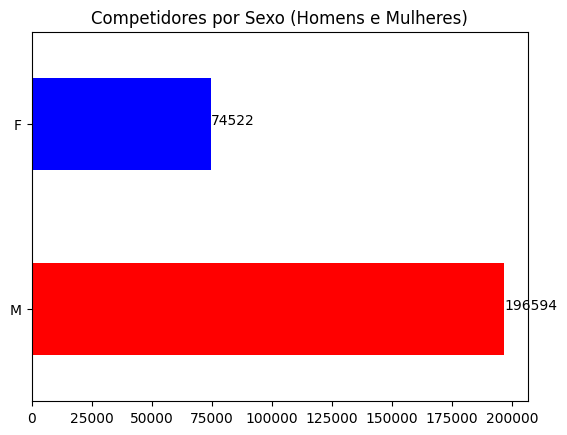

In [ ]:
# Gráfico de barras
Sexo = df2['Sexo'].value_counts()
Sexo.plot(kind='barh', color = ['red', 'blue'],)
for index, value in enumerate(Sexo):
    plt.text(value, index,
             str(value))
plt.title('Competidores por Sexo (Homens e Mulheres)')


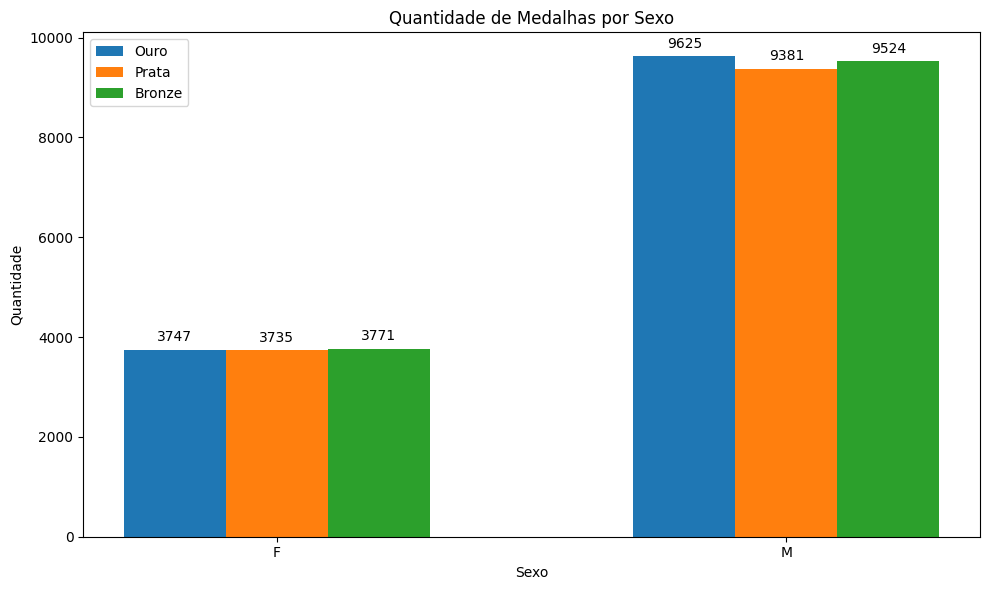

In [ ]:
# Gráfico de quantidade de medalhas por sexo

medalhas_por_sexo = df2.groupby('Sexo')['Medalha'].value_counts().unstack(fill_value=0)

# Configurar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2  # Largura de cada barra
x = np.arange(len(medalhas_por_sexo.index))

# Plotar as barras para cada categoria de medalha
bar1 = ax.bar(x - width, medalhas_por_sexo['Ouro'], width, label='Ouro')
bar2 = ax.bar(x, medalhas_por_sexo['Prata'], width, label='Prata')
bar3 = ax.bar(x + width, medalhas_por_sexo['Bronze'], width, label='Bronze')
#bar4 = ax.bar(x + 2 * width, medalhas_por_sexo['NaN'], width, label='NaN')

# Adicionar valores nas barras
def adicionar_valores(barras):
    for bar in barras:
        altura = bar.get_height()
        ax.annotate('{}'.format(altura),
                    xy=(bar.get_x() + bar.get_width() / 2, altura),
                    xytext=(0, 4),  # Deslocamento vertical para melhor alinhamento
                    textcoords="offset points",
                    ha='center', va='bottom')

adicionar_valores(bar1)
adicionar_valores(bar2)
adicionar_valores(bar3)
#adicionar_valores(bar4)

# Configurar rótulos e legendas
ax.set_title('Quantidade de Medalhas por Sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Quantidade')
ax.set_xticks(x)
ax.set_xticklabels(medalhas_por_sexo.index)
ax.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()

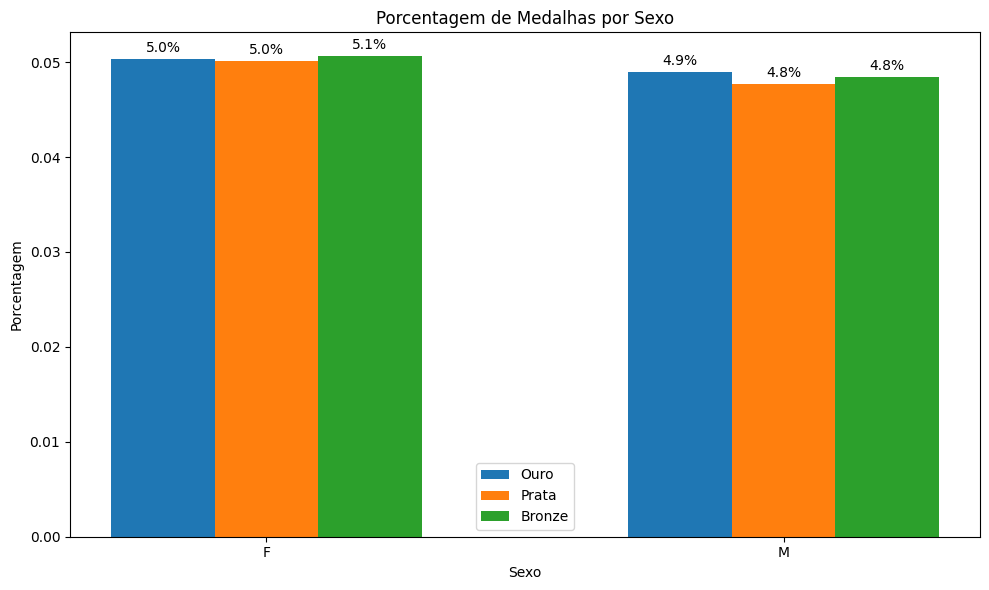

Neste gráfico fica claro que as mulheres tiveram um melhor aproveitamento


In [ ]:
# Gráfico de porcentagem de medalhas por sexo

medalhas_por_sexo = df2.groupby('Sexo')['Medalha'].value_counts(normalize=True).unstack(fill_value=0)

# Configurar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2  # Largura de cada barra
x = np.arange(len(medalhas_por_sexo.index))

# Plotar as barras para cada categoria de medalha
bar1 = ax.bar(x - width, medalhas_por_sexo['Ouro'], width, label='Ouro')
bar2 = ax.bar(x, medalhas_por_sexo['Prata'], width, label='Prata')
bar3 = ax.bar(x + width, medalhas_por_sexo['Bronze'], width, label='Bronze')
#bar4 = ax.bar(x + 2 * width, medalhas_por_sexo['NaN'], width, label='NaN')


# Adicionar valores nas barras
def adicionar_valores(barras):
    for bar in barras:
        altura = bar.get_height()
        ax.annotate('{:.1%}'.format(altura),
                    xy=(bar.get_x() + bar.get_width() / 2, altura),
                    xytext=(0, 3),  # Deslocamento vertical para melhor alinhamento
                    textcoords="offset points",
                    ha='center', va='bottom')


adicionar_valores(bar1)
adicionar_valores(bar2)
adicionar_valores(bar3)
#adicionar_valores(bar4)

# Configurar rótulos e legendas
ax.set_title('Porcentagem de Medalhas por Sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Porcentagem')
ax.set_xticks(x)
ax.set_xticklabels(medalhas_por_sexo.index)
ax.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()
print('Neste gráfico fica claro que as mulheres tiveram um melhor aproveitamento')

In [ ]:
df2

,ID,Nome,Sexo,Idade,Equipe,NOC,Ano,Temporada,Cidade,Esporte,Evento,Medalha
0,1,A Dijiang,M,24.0,Joe,CHN,1992,Verao,Barcelona,Basketball,Basquete Basquete Masculino,NaN
1,2,A Lamusi,M,23.0,Joe,CHN,2012,Verao,London,Judô,Judô Masculino Extra-Leve,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,Bimbo,DEN,1920,Verao,Antwerpen,Futebol,Futebol Masculino,NaN
3,4,Edgar Lindenau Aabye,M,34.0,Feo,DEN,1900,Verao,Paris,Cabo de guerra,Cabo-de-Guerra Masculino Cabo-de-Guerra,Ouro
4,5,Christine Jacoba Aaftink,F,21.0,Gema,NED,1988,Inverno,Calgary,patinação de velocidade,Patinação de Velocidade 500 metros Feminino,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,Júpiter,POL,1976,Inverno,Innsbruck,Luge,Luge Mista (Masculina) Duplas,NaN
271112,135570,Piotr ya,M,27.0,Nan-2,POL,2014,Inverno,Sochi,Salto de esqui,"Salto de esqui masculino em ladeira grande, in...",NaN
271113,135570,Piotr ya,M,27.0,Nan-2,POL,2014,Inverno,Sochi,Salto de esqui,"Salto de esqui masculino em ladeira grande, Eq...",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,Nan-2,POL,1998,Inverno,Nagano,Bobsleigh,Bobsleigh Masculino Quatro,NaN


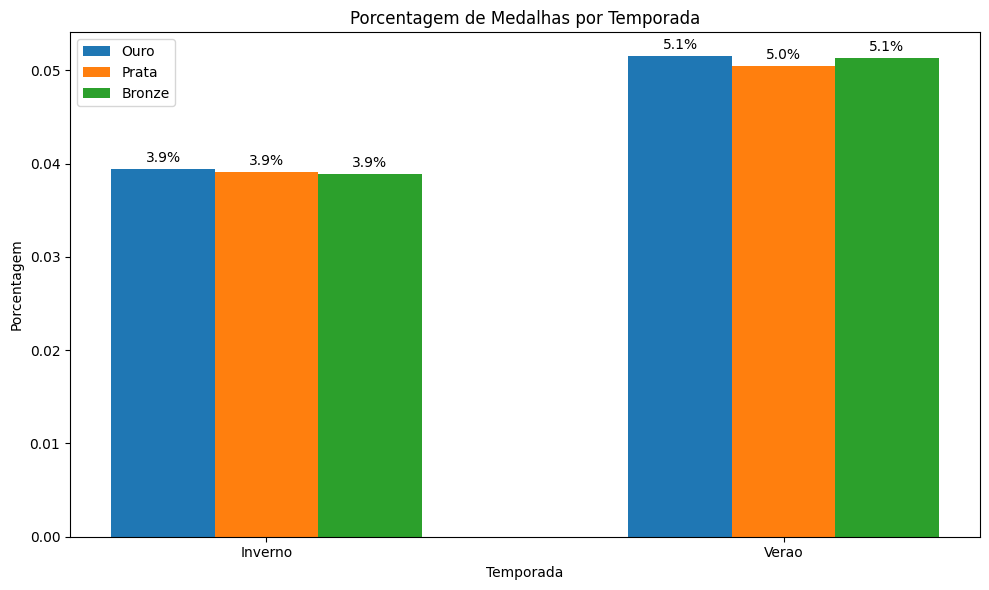

Neste gráfico vemos a divisão de medalhas por temporada


In [ ]:
# Gráfico de porcentagem de medalhas por temporada

medalhas_por_temporada = df2.groupby('Temporada')['Medalha'].value_counts(normalize=True).unstack(fill_value=0)

# Configurar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2  # Largura de cada barra
x = np.arange(len(medalhas_por_sexo.index))

# Plotar as barras para cada categoria de medalha
bar1 = ax.bar(x - width, medalhas_por_temporada['Ouro'], width, label='Ouro')
bar2 = ax.bar(x, medalhas_por_temporada['Prata'], width, label='Prata')
bar3 = ax.bar(x + width, medalhas_por_temporada['Bronze'], width, label='Bronze')
#bar4 = ax.bar(x + 2 * width, medalhas_por_sexo['NaN'], width, label='NaN')


# Adicionar valores nas barras
def adicionar_valores(barras):
    for bar in barras:
        altura = bar.get_height()
        ax.annotate('{:.1%}'.format(altura),
                    xy=(bar.get_x() + bar.get_width() / 2, altura),
                    xytext=(0, 3),  # Deslocamento vertical para melhor alinhamento
                    textcoords="offset points",
                    ha='center', va='bottom')


adicionar_valores(bar1)
adicionar_valores(bar2)
adicionar_valores(bar3)
#adicionar_valores(bar4)

# Configurar rótulos e legendas
ax.set_title('Porcentagem de Medalhas por Temporada')
ax.set_xlabel('Temporada')
ax.set_ylabel('Porcentagem')
ax.set_xticks(x)
ax.set_xticklabels(medalhas_por_temporada.index)
ax.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()
print('Neste gráfico vemos a divisão de medalhas por temporada')

### Pizza

Text(0.5, 1.0, 'Comparação em % de Homens e Mulheres')

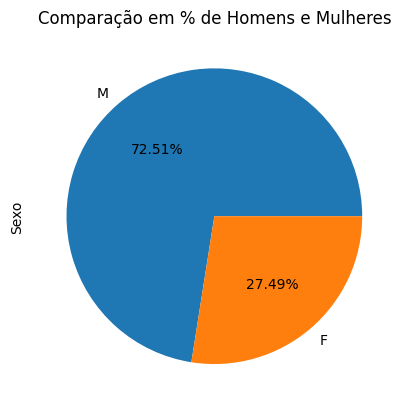

In [ ]:
# Gráfico de Pizza
Sexo.plot(kind='pie', autopct='%1.2f%%')
plt.title('Comparação em % de Homens e Mulheres')

## Gráficos da Base IDH por País

### Boxplot

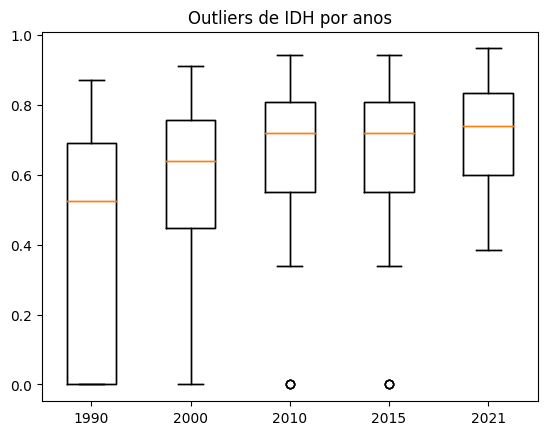

In [ ]:
# Gráfico para mostrar os outliers da Base paises

data = [ df_paises._1990, df_paises._2000,  df_paises._2010,  df_paises._2015,  df_paises._2021]
plt.boxplot(data)
plt.title('Outliers de IDH por anos')
plt.boxplot(data)
plt.xticks([1, 2, 3, 4, 5], [1990, 2000, 2010, 2015, 2021])
plt.show()


#Nota: Os países dados como outliers nas colunas 2010 e 2015 são países que não
#apresentaram dados na tabela nesses anos, portanto, foram preenchidos com 0

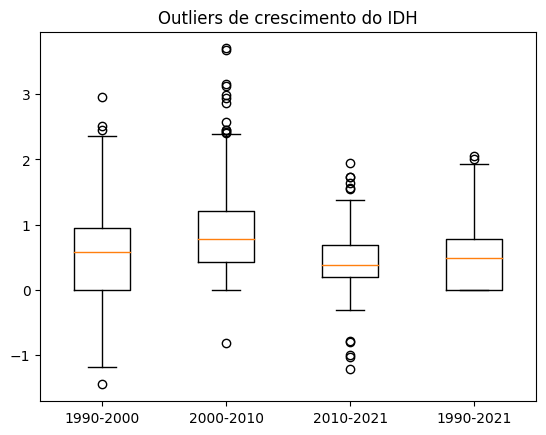

In [ ]:
# Gráfico para mostrar os outliers da base Decenal

data = [ df_decenal._1990_2000, df_decenal._2000_2010,  df_decenal._2010_2021,  df_decenal._1990_2021]
plt.boxplot(data)
plt.title('Outliers de crescimento do IDH')
plt.xticks([1, 2, 3, 4], ['1990-2000', '2000-2010', '2010-2021', '1990-2021'])
plt.show()


#Nota: nesse contexto, os outliers representam países que tiveram um crescimento
#muito abaixo ou muito elevado em comparação aos demais em um mesmo período